**Histórico dos dados dos fundos imobiliários**
* https://dados.cvm.gov.br/dataset/fii-doc-inf_mensal
* https://dados.cvm.gov.br/dataset/fii-doc-inf_trimestral
* https://dados.cvm.gov.br/dataset/fii-doc-inf_anual

---
O arquivo zipado 'inf_mensal_fii_XXXX' contém vários arquivos excel. Os arquivos que eu tenho interesse são:
* inf_mensal_fii_ativo_passivo_XXXX: contém os dados sobre "Obrigacoes_Aquisicao_Imoveis" e "Obrigacoes_Securitizacao_Recebiveis";
* inf_mensal_fii_complemento_XXXX: contém o dado sobre "Valor_Ativo".

In [1]:
from funcoes import *
import glob
import matplotlib.pyplot as plt
import os
import plotly.express as px
import zipfile

## Extraindo os arquivos zipados

### Extração dos arquivos "inf_mensal_fii_ativo_passivo_XXXX" e "inf_mensal_fii_complemento_XXXX"

In [2]:
# Mês e ano escolhido
ano = '2024'

# Nome do arquivo zipado
zip_filename = f'C://Users//vitor//projetos_python//python_b3//historico-arquivos//fundos_investimentos//fii_cvm_zip//inf_mensal_fii_{ano}.zip'

# # Visualizando a lista dos nomes dos arquivos dentro do arquivo zipado
# with zipfile.ZipFile(zip_filename, 'r') as zip_ref:
#     print("Arquivos dentro do arquivo zipado:")
#     print(zip_ref.namelist())

# Lista dos nomes dos arquivos que você deseja extrair
arquivos_a_extrair = [
    f'inf_mensal_fii_ativo_passivo_{ano}.csv', 
    f'inf_mensal_fii_complemento_{ano}.csv', 
    f'inf_mensal_fii_geral_{ano}.csv'
]

# Caminho do diretório do diretório do arquivo não zipado
destino_dir = f'C://Users//vitor//projetos_python//python_b3//historico-arquivos//fundos_investimentos//fii_cvm//{ano}'

# Abrindo o arquivo zipado
with zipfile.ZipFile(zip_filename, 'r') as zip_ref:
    # Extraindo os arquivos selecionados para um diretório específico
    for arquivo in arquivos_a_extrair:
        zip_ref.extract(arquivo, destino_dir)

        # Caminhos dos arquivos em formato csv e parquet
        csv_path = f'{destino_dir}//{arquivo}'
        parquet_path = f'{destino_dir}//{arquivo.replace(".csv", ".parquet")}'

        # Lendo os arquivos csv
        df = pd.read_csv(csv_path, sep=';', encoding='ISO-8859-1', low_memory=False)

        # Transformando esses arquivos em parquet
        df.to_parquet(parquet_path)

# Entrando para o diretório especificado
os.chdir(destino_dir)

# Encontrando todos os arquivos .csv no diretório
arquivos_csv = glob.glob('*.csv')

# Loop para deletar cada arquivo csv encontrado
for arquivo in arquivos_csv:
    os.remove(arquivo)

## Fundos Imobiliários

In [3]:
# Lendo o arquivo da composição do IFIX
ifix_mai_ago_2024 = filtro_etf(path='C://Users//vitor//projetos_python//python_b3//composicao-fundos-de-investimentos//fundo_imobiliario//ifix//IFIX_2024_MAI_AGO.csv')
ifix_set_dez_2024 = filtro_etf(path='C://Users//vitor//projetos_python//python_b3//composicao-fundos-de-investimentos//fundo_imobiliario//ifix//IFIX_2024_SET_DEZ.csv')

# Ordenando o df pela ordem alfabética dos tickers
ifix_mai_ago_2024 = ifix_mai_ago_2024.sort_values('Código')
ifix_set_dez_2024 = ifix_set_dez_2024.sort_values('Código')

# Transformando em listas
lista_ifix_atual = ifix_set_dez_2024['Código'].tolist()
lista_ifix_anterior = ifix_mai_ago_2024['Código'].tolist()

# Diferença entre as carteiras
fiis_sairam_carteira_atual = sorted(set(lista_ifix_anterior) - set(lista_ifix_atual))
fiis_entraram_carteira_atual = sorted(set(lista_ifix_atual) - set(lista_ifix_anterior))

print(f'A carteira teórioca do IFIX atual é composta por {len(ifix_set_dez_2024)} ações.')
print(f'A carteira teórioca do IFIX anterior é composta por {len(ifix_mai_ago_2024)} ações.')
print('-'*30)
print(f'O número de ações semelhantes são de {len(set(lista_ifix_atual) & set(lista_ifix_anterior))}.')
print(f'Ações semelhantes entre as duas carteiras: {sorted(set(lista_ifix_atual) & set(lista_ifix_anterior))}.')
print('-'*30)
print(f'Número de ações diferentes entre as duas carteiras: {len(set(lista_ifix_anterior) - set(lista_ifix_atual))}.')
print(f'FIIs que sairam da carteira atual: {fiis_sairam_carteira_atual}')
print(f'FIIs que entraram na carteira atual: {fiis_entraram_carteira_atual}')

A carteira teórioca do IFIX atual é composta por 115 ações.
A carteira teórioca do IFIX anterior é composta por 112 ações.
------------------------------
O número de ações semelhantes são de 107.
Ações semelhantes entre as duas carteiras: ['AFHI11', 'AIEC11', 'AJFI11', 'ALZR11', 'ARRI11', 'BARI11', 'BCFF11', 'BCIA11', 'BCRI11', 'BLMG11', 'BPFF11', 'BRCO11', 'BRCR11', 'BROF11', 'BTAL11', 'BTCI11', 'BTLG11', 'BTRA11', 'CACR11', 'CLIN11', 'CPTS11', 'CVBI11', 'CYCR11', 'DEVA11', 'FATN11', 'GARE11', 'GGRC11', 'GTWR11', 'HABT11', 'HCTR11', 'HFOF11', 'HGBS11', 'HGCR11', 'HGFF11', 'HGLG11', 'HGPO11', 'HGRE11', 'HGRU11', 'HSAF11', 'HSLG11', 'HSML11', 'HTMX11', 'IRDM11', 'JSAF11', 'JSRE11', 'KCRE11', 'KFOF11', 'KISU11', 'KNCR11', 'KNHF11', 'KNHY11', 'KNIP11', 'KNRI11', 'KNSC11', 'KORE11', 'LGCP11', 'LVBI11', 'MALL11', 'MCCI11', 'MCHY11', 'MFII11', 'MXRF11', 'OUJP11', 'PATL11', 'PORD11', 'PVBI11', 'RBFF11', 'RBRF11', 'RBRL11', 'RBRP11', 'RBRR11', 'RBRX11', 'RBRY11', 'RBVA11', 'RCRB11', 'RECR11', 

* Esses CNPJs do "dict_cnpj" foram adicionados na mão. Eu não achei uma maneira de automatizar esse processo.

In [4]:
# IFIX 2024 (MAI-AGO)
dict_cnpj_mai_ago_2024 = {
    'KNIP11':'24.960.430/0001-13',
    'XPML11':'28.757.546/0001-00',
    'KNCR11':'16.706.958/0001-32',
    'HGLG11':'11.728.688/0001-47',
    'KNRI11':'12.005.956/0001-65',
    'BTLG11':'11.839.593/0001-09',
    'VISC11':'17.554.274/0001-25',
    'MXRF11':'97.521.225/0001-25',
    'XPLG11':'26.502.794/0001-85',
    'KNHY11':'30.130.708/0001-28',
    'HGBS11':'08.431.747/0001-06',
    'IRDM11':'28.830.325/0001-10',
    'CPTS11':'18.979.895/0001-13',
    'PVBI11':'35.652.102/0001-76',
    'HGRU11':'29.641.226/0001-53',
    'TGAR11':'25.032.881/0001-53',
    'RECR11':'28.152.272/0001-26',
    'BRCO11':'20.748.515/0001-81',
    'HSML11':'32.892.018/0001-31',
    'KNHF11':'42.754.342/0001-47',
    'TRXF11':'28.548.288/0001-52',
    'LVBI11':'30.629.603/0001-18',
    'BCFF11':'11.026.627/0001-38',
    'RZTR11':'36.501.128/0001-86',
    'HFOF11':'18.307.582/0001-19',
    'TVRI11':'14.410.722/0001-29',
    'HGCR11':'11.160.521/0001-22',
    'MCCI11':'23.648.935/0001-84',
    'VGHF11':'36.771.692/0001-19',
    'MALL11':'26.499.833/0001-32',
    'BRCR11':'08.924.783/0001-01',
    'HGRE11':'09.072.017/0001-29',
    'JSRE11':'13.371.132/0001-71',
    'RBRY11':'30.166.700/0001-11',
    'VILG11':'24.853.044/0001-22',
    'RBRR11':'29.467.977/0001-03',
    'RBVA11':'15.576.907/0001-70',
    'VCJR11':'32.400.250/0001-05',
    'VRTA11':'11.664.201/0001-00',
    'KNSC11':'35.864.448/0001-38',
    'ALZR11':'28.737.771/0001-85',
    'GARE11':'37.295.919/0001-60',
    'GGRC11':'26.614.291/0001-00',
    'HSLG11':'32.903.621/0001-71',
    'RBRF11':'27.529.279/0001-51',
    'VGIP11':'34.197.811/0001-46',
    'MCHY11':'36.655.973/0001-06',
    'CVBI11':'28.729.197/0001-13',
    'KORE11':'52.219.978/0001-42',
    'BTCI11':'09.552.812/0001-14',
    'GTWR11':'23.740.527/0001-58',
    'VGIR11':'29.852.732/0001-91',
    'URPR11':'34.508.872/0001-87',
    'RVBI11':'35.507.457/0001-71',
    'TRBL11':'16.671.412/0001-93',
    'RZAK11':'36.642.219/0001-31',
    'XPCI11':'28.516.301/0001-91',
    'JSAF11':'42.085.661/0001-07',
    'RBRP11':'21.408.063/0001-51',
    'HABT11':'30.578.417/0001-05',
    'HCTR11':'30.248.180/0001-96',
    'DEVA11':'37.087.810/0001-37',
    'VINO11':'12.516.185/0001-70',
    'BROF11':'48.978.859/0001-04',
    'RCRB11':'03.683.056/0001-86',
    'XPIN11':'28.516.325/0001-40',
    'RBRL11':'35.705.463/0001-33',
    'HGPO11':'11.260.134/0001-68',
    'MFII11':'16.915.968/0001-88',
    'BCRI11':'22.219.335/0001-38',
    'SARE11':'32.903.702/0001-71',
    'KFOF11':'30.091.444/0001-40',
    'CLIN11':'49.005.348/0001-60',
    'BTAL11':'36.642.244/0001-15',
    'TEPP11':'26.681.370/0001-25',
    'SNCI11':'41.076.710/0001-82',
    'CACR11':'32.065.364/0001-46',
    'AFHI11':'36.642.293/0001-58',
    'BCIA11':'20.216.935/0001-17',
    'BARI11':'29.267.567/0001-00',
    'KISU11':'36.669.660/0001-07',
    'RZAT11':'28.267.696/0001-36',
    'XPSF11':'30.983.020/0001-90',
    'KCRE11':'42.502.802/0001-40',
    'PORD11':'17.156.502/0001-09',
    'RECT11':'32.274.163/0001-59',
    'BPFF11':'17.324.357/0001-28',
    'PATL11':'35.754.164/0001-99',
    'LGCP11':'34.598.181/0001-11',
    'OUJP11':'26.091.656/0001-50',
    'AJFI11':'51.472.985/0001-99',
    'RBRX11':'41.088.458/0001-21',
    'HTMX11':'08.706.065/0001-69',
    'AIEC11':'35.765.826/0001-26',
    'HGFF11':'32.784.898/0001-22',
    'SNFF11':'40.011.225/0001-68',
    'WHGR11':'41.256.643/0001-88',
    'RBFF11':'17.329.029/0001-14',
    'FATN11':'30.567.216/0001-02',
    'HSAF11':'35.360.687/0001-50',
    'CPFF11':'34.081.611/0001-23',
    'SPXS11':'43.010.543/0001-00',
    'VIUR11':'36.445.587/0001-90',
    'PLCR11':'32.527.683/0001-26',
    'BTRA11':'41.076.607/0001-32',
    'BLMG11':'34.081.637/0001-71',
    'ARRI11':'32.006.821/0001-21',
    'CYCR11':'36.501.233/0001-15',
    'XPPR11':'30.654.849/0001-40',
    'NCHB11':'18.085.673/0001-57',
    'VSLH11':'36.244.015/0001-42',
    'TORD11':'30.230.870/0001-18'
}

# IFIX 2024 (SET-DEZ)
dict_cnpj_set_dez_2024 = {
    'KNIP11':'24.960.430/0001-13',
    'KNCR11':'16.706.958/0001-32',
    'XPML11':'28.757.546/0001-00',
    'HGLG11':'11.728.688/0001-47',
    'BTLG11':'11.839.593/0001-09',
    'MXRF11':'97.521.225/0001-25',
    'KNRI11':'12.005.956/0001-65',
    'HGRU11':'29.641.226/0001-53',
    'VISC11':'17.554.274/0001-25',
    'XPLG11':'26.502.794/0001-85',
    'KNHY11':'30.130.708/0001-28',
    'TGAR11':'25.032.881/0001-53',
    'HGBS11':'08.431.747/0001-06',
    'IRDM11':'28.830.325/0001-10',
    'CPTS11':'18.979.895/0001-13',
    'PVBI11':'35.652.102/0001-76',
    'RECR11':'28.152.272/0001-26',
    'TRXF11':'28.548.288/0001-52',
    'HSML11':'32.892.018/0001-31',
    'KNHF11':'42.754.342/0001-47',
    'BRCO11':'20.748.515/0001-81',
    'LVBI11':'30.629.603/0001-18',
    'RZTR11':'36.501.128/0001-86',
    'KNSC11':'35.864.448/0001-38',
    'BCFF11':'11.026.627/0001-38',
    'TVRI11':'14.410.722/0001-29',
    'KNUQ11':'42.754.362/0001-18',
    'HFOF11':'18.307.582/0001-19',
    'HGCR11':'11.160.521/0001-22',
    'VGIR11':'29.852.732/0001-91',
    'MCCI11':'23.648.935/0001-84',
    'VGHF11':'36.771.692/0001-19',
    'MALL11':'26.499.833/0001-32',
    'VRTA11':'11.664.201/0001-00',
    'RBRR11':'29.467.977/0001-03',
    'VCJR11':'32.400.250/0001-05',
    'BRCR11':'08.924.783/0001-01',
    'HGRE11':'09.072.017/0001-29',
    'RBVA11':'15.576.907/0001-70',
    'JSRE11':'13.371.132/0001-71',
    'ALZR11':'28.737.771/0001-85',
    'VILG11':'24.853.044/0001-22',
    'GZIT11':'15.447.108/0001-02',
    'RBRY11':'30.166.700/0001-11',
    'GGRC11':'26.614.291/0001-00',
    'GARE11':'37.295.919/0001-60',
    'HSLG11':'32.903.621/0001-71',
    'MCHY11':'36.655.973/0001-06',
    'VGIP11':'34.197.811/0001-46',
    'CVBI11':'28.729.197/0001-13',
    'RBRF11':'27.529.279/0001-51',
    'KORE11':'52.219.978/0001-42',
    'BTCI11':'09.552.812/0001-14',
    'GTWR11':'23.740.527/0001-58',
    'URPR11':'34.508.872/0001-87',
    'JSAF11':'42.085.661/0001-07',
    'RVBI11':'35.507.457/0001-71',
    'XPCI11':'28.516.301/0001-91',
    'TRBL11':'16.671.412/0001-93',
    'RZAK11':'36.642.219/0001-31',
    'HABT11':'30.578.417/0001-05',
    'RBRP11':'21.408.063/0001-51',
    'CPSH11':'47.896.665/0001-99',
    'BPML11':'33.046.142/0001-49',
    'HCTR11':'30.248.180/0001-96',
    'KFOF11':'30.091.444/0001-40',
    'DEVA11':'37.087.810/0001-37',
    'XPIN11':'28.516.325/0001-40',
    'BROF11':'48.978.859/0001-04',
    'MFII11':'16.915.968/0001-88',
    'RBRL11':'35.705.463/0001-33',
    'HGPO11':'11.260.134/0001-68',
    'CACR11':'32.065.364/0001-46',
    'VINO11':'12.516.185/0001-70',
    'RCRB11':'03.683.056/0001-86',
    'BTAL11':'36.642.244/0001-15',
    'AFHI11':'36.642.293/0001-58',
    'BCRI11':'22.219.335/0001-38',
    'CLIN11':'49.005.348/0001-60',
    'SNCI11':'41.076.710/0001-82',
    'BCIA11':'20.216.935/0001-17',
    'TEPP11':'26.681.370/0001-25',
    'SARE11':'32.903.702/0001-71',
    'BARI11':'29.267.567/0001-00',
    'RZAT11':'28.267.696/0001-36',
    'KISU11':'36.669.660/0001-07',
    'KCRE11':'42.502.802/0001-40',
    'MANA11':'42.888.583/0001-89',
    'PORD11':'17.156.502/0001-09',
    'XPSF11':'30.983.020/0001-90',
    'FATN11':'30.567.216/0001-02',
    'BPFF11':'17.324.357/0001-28',
    'PATL11':'35.754.164/0001-99',
    'WHGR11':'41.256.643/0001-88',
    'LGCP11':'34.598.181/0001-11',
    'RECT11':'32.274.163/0001-59',
    'HTMX11':'08.706.065/0001-69',
    'RBRX11':'41.088.458/0001-21',
    'AIEC11':'35.765.826/0001-26',
    'AJFI11':'51.472.985/0001-99',
    'OUJP11':'26.091.656/0001-50',
    'SNFF11':'40.011.225/0001-68',
    'HGFF11':'32.784.898/0001-22',
    'RBFF11':'17.329.029/0001-14',
    'HSAF11':'35.360.687/0001-50',
    'SPXS11':'43.010.543/0001-00',
    'BLMG11':'34.081.637/0001-71',
    'KIVO11':'42.273.325/0001-98',
    'VIUR11':'36.445.587/0001-90',
    'SNEL11':'43.741.171/0001-84',
    'ARRI11':'32.006.821/0001-21',
    'CYCR11':'36.501.233/0001-15',
    'BTRA11':'41.076.607/0001-32',
    'ZAVI11':'40.575.940/0001-23',
    'VSLH11':'36.244.015/0001-42'
}

In [5]:
# Dados mensais dos FIIs de 2022
df_fii_2022 = open_arquivos_fii(
    fii_ativo_passivo_path='C://Users//vitor//projetos_python//python_b3//historico-arquivos//fundos_investimentos//fii_cvm//2022//inf_mensal_fii_ativo_passivo_2022.parquet',
    fii_complemento_path='C://Users//vitor//projetos_python//python_b3//historico-arquivos//fundos_investimentos//fii_cvm//2022//inf_mensal_fii_complemento_2022.parquet',
    fii_geral_path='C://Users//vitor//projetos_python//python_b3//historico-arquivos//fundos_investimentos//fii_cvm//2022//inf_mensal_fii_geral_2022.parquet'
)

# Dados mensais dos FIIs de 2023
df_fii_2023 = open_arquivos_fii(
    fii_ativo_passivo_path='C://Users//vitor//projetos_python//python_b3//historico-arquivos//fundos_investimentos//fii_cvm//2023//inf_mensal_fii_ativo_passivo_2023.parquet',
    fii_complemento_path='C://Users//vitor//projetos_python//python_b3//historico-arquivos//fundos_investimentos//fii_cvm//2023//inf_mensal_fii_complemento_2023.parquet',
    fii_geral_path='C://Users//vitor//projetos_python//python_b3//historico-arquivos//fundos_investimentos//fii_cvm//2023//inf_mensal_fii_geral_2023.parquet'
)

# Dados mensais dos FIIs de 2024
df_fii_2024 = open_arquivos_fii(
    fii_ativo_passivo_path='C://Users//vitor//projetos_python//python_b3//historico-arquivos//fundos_investimentos//fii_cvm//2024//inf_mensal_fii_ativo_passivo_2024.parquet',
    fii_complemento_path='C://Users//vitor//projetos_python//python_b3//historico-arquivos//fundos_investimentos//fii_cvm//2024//inf_mensal_fii_complemento_2024.parquet',
    fii_geral_path='C://Users//vitor//projetos_python//python_b3//historico-arquivos//fundos_investimentos//fii_cvm//2024//inf_mensal_fii_geral_2024.parquet'
)

# Juntando os dfs
df_fii_compilado = pd.concat([
    df_fii_2022, 
    df_fii_2023, 
    df_fii_2024
])

# Extraindo os CNPJs do 'dict_cnpj_xxx_xxx_202x'
cnpjs_mai_ago_2024 = dict_cnpj_mai_ago_2024.values()
cnpjs_set_dez_2024 = dict_cnpj_set_dez_2024.values()

# Selecionando apenas os FIIs que estão no IFIX
df_ifix_mai_ago_2024 = df_fii_compilado[df_fii_compilado['CNPJ_Fundo'].isin(cnpjs_mai_ago_2024)]
df_ifix_set_dez_2024 = df_fii_compilado[df_fii_compilado['CNPJ_Fundo'].isin(cnpjs_set_dez_2024)]

# Fazendo uma cópia
df_ifix_mai_ago_2024 = df_ifix_mai_ago_2024.copy() 
df_ifix_set_dez_2024 = df_ifix_set_dez_2024.copy() 

# Criando um dicionário reverso para mapear CNPJ (key) para ticker (value)
reverse_dict_cnpj_mai_ago_2024 = {v: k for k, v in dict_cnpj_mai_ago_2024.items()}
reverse_dict_cnpj_set_dez_2024 = {v: k for k, v in dict_cnpj_set_dez_2024.items()}

# Adicionando a coluna de tickers no df
df_ifix_mai_ago_2024['Ticker'] = df_ifix_mai_ago_2024['CNPJ_Fundo'].map(reverse_dict_cnpj_mai_ago_2024)
df_ifix_set_dez_2024['Ticker'] = df_ifix_set_dez_2024['CNPJ_Fundo'].map(reverse_dict_cnpj_set_dez_2024)

# Existe um fundo 'CACR11' (CNPJ:97.521.225/0001-25) que o 'Segmento_Atuacao' é 0, substituindo por 'Híbrido'
df_ifix_mai_ago_2024['Segmento_Atuacao'] = df_ifix_mai_ago_2024['Segmento_Atuacao'].replace(0, 'Híbrido')
df_ifix_set_dez_2024['Segmento_Atuacao'] = df_ifix_set_dez_2024['Segmento_Atuacao'].replace(0, 'Híbrido')

# Selecionando a coluna 'Data_Referencia' como index
df_ifix_mai_ago_2024 = df_ifix_mai_ago_2024.set_index('Data_Referencia')
df_ifix_set_dez_2024 = df_ifix_set_dez_2024.set_index('Data_Referencia')

In [7]:
# Dados históricos do IFIX - de 2011 até 01-10-2024
# https://br.investing.com/indices/bm-fbovespa-real-estate-ifix-historical-data

ifix_precos = pd.read_csv(
    'C://Users//vitor//projetos_python//python_b3//composicao-fundos-de-investimentos//fundo_imobiliario//ifix//dados_historicos_ifix_01102024.csv',
    sep=','
)

# Removendo a coluna 'Vol.' e 'Var%'
ifix_precos = ifix_precos.drop(columns=['Vol.', 'Var%'])

# Renomeando as colunas
ifix_precos = ifix_precos.rename(columns={
    'Data': 'Date',
    'Último': 'Close',
    'Abertura': 'Open',
    'Máxima': 'High',
    'Mínima': 'Low',
})

# Arrumando os dtypes das colunas
ifix_precos['Close'] = ifix_precos['Close'].str.replace('.', '', regex=True).str.replace(',', '.', regex=True).astype(float)
ifix_precos['Open'] = ifix_precos['Open'].str.replace('.', '', regex=True).str.replace(',', '.', regex=True).astype(float)
ifix_precos['High'] = ifix_precos['High'].str.replace('.', '', regex=True).str.replace(',', '.', regex=True).astype(float)
ifix_precos['Low'] = ifix_precos['Low'].str.replace('.', '', regex=True).str.replace(',', '.', regex=True).astype(float)
ifix_precos['Date'] = pd.to_datetime(ifix_precos['Date'], format='%d.%m.%Y')

# Definindo a coluna 'Date' como index
ifix_precos = ifix_precos.set_index('Date')

# Invertendo o df
ifix_precos = ifix_precos.iloc[::-1]

# Calculando a variação percentual
ifix_precos['pct_change'] = round(ifix_precos['Close'].pct_change() * 100, 4)

# Calculando a variação percentual acumulada
ifix_precos['pct_change_accum'] = round((1 + (ifix_precos['pct_change']/100)).cumprod(), 4) 
# Primeiro dia começa em 1
ifix_precos['pct_change_accum'].iloc[0] = 1

ifix_precos

,Close,Open,High,Low,pct_change,pct_change_accum
Date,,,,,,
2011-01-03,1001.11,1001.11,1001.11,1001.11,NaN,1.0000
2011-01-04,992.56,992.56,992.56,992.56,-0.8541,0.9915
2011-01-05,998.65,998.65,998.65,998.65,0.6136,0.9975
2011-01-06,996.31,996.31,996.31,996.31,-0.2343,0.9952
2011-01-07,1000.82,1000.82,1000.82,1000.82,0.4527,0.9997
...,...,...,...,...,...,...
2024-09-25,3293.73,3303.53,3307.08,3291.26,-0.2967,3.2901
2024-09-26,3294.14,3293.72,3295.79,3290.99,0.0124,3.2905
2024-09-27,3309.13,3294.21,3311.82,3294.21,0.4551,3.3055


In [8]:
# Contando os números de cada segmento de atuação dos FIIs (Maio a Agosto 2024)
segmentos_fii_mai_ago_2024 = df_ifix_mai_ago_2024['Segmento_Atuacao'].value_counts()

# Contando os números de cada segmento de atuação dos FIIs (Setembro a Dezembro 2024)
segmentos_fii_set_dez_2024 = df_ifix_set_dez_2024['Segmento_Atuacao'].value_counts()

# Criando subplots com duas colunas
fig = make_subplots(
    rows=1, cols=2, 
    specs=[[{'type':'domain'}, {'type':'domain'}]],  # Definindo o tipo de gráfico como 'domain' para gráficos de pizza
    subplot_titles=['Distribuição dos Segmentos dos IFIX (Maio a Agosto 2024)', 'Distribuição dos Segmentos dos IFIX (Setembro a Dezembro 2024)']
)

# Adicionando o primeiro gráfico de pizza (Maio a Agosto 2024)
fig.add_trace(
    go.Pie(labels=segmentos_fii_mai_ago_2024.index, values=segmentos_fii_mai_ago_2024),
    row=1, col=1
)

# Adicionando o segundo gráfico de pizza (Setembro a Dezembro 2024)
fig.add_trace(
    go.Pie(labels=segmentos_fii_set_dez_2024.index, values=segmentos_fii_set_dez_2024),
    row=1, col=2
)

# Atualizando o layout
fig.update_layout(
    title_text='Distribuição dos Segmentos dos IFIX (2024)',
    title_x=0.5  # Centralizando o título
)

fig.show()

In [10]:
# Ordenando em ordem alfabetica o df para ficar na mesma ordem do 'ifix_mai_ago_2024'
df_ifix_alfabetico = df_ifix_mai_ago_2024.sort_values('Ticker')

# Calculando a DY médio mensal
lst_dy_medio = []

ifix_dy_medio_mensal_202405 = np.average(df_ifix_alfabetico.loc[f'2024-05', 'Percentual_Dividend_Yield_Mes'], weights=ifix_mai_ago_2024['Part. (%)'])
ifix_dy_medio_mensal_202406 = np.average(df_ifix_alfabetico.loc[f'2024-06', 'Percentual_Dividend_Yield_Mes'], weights=ifix_mai_ago_2024['Part. (%)'])
ifix_dy_medio_mensal_202407 = np.average(df_ifix_alfabetico.loc[f'2024-07', 'Percentual_Dividend_Yield_Mes'], weights=ifix_mai_ago_2024['Part. (%)'])
ifix_dy_medio_mensal_202408 = np.average(df_ifix_alfabetico.loc[f'2024-08', 'Percentual_Dividend_Yield_Mes'], weights=ifix_mai_ago_2024['Part. (%)'])

print(f'DY médio de 05-2024 foi de {ifix_dy_medio_mensal_202405:.4f}')
print(f'DY médio de 06-2024 foi de {ifix_dy_medio_mensal_202406:.4f}')
print(f'DY médio de 07-2024 foi de {ifix_dy_medio_mensal_202407:.4f}')
print(f'DY médio de 08-2024 foi de {ifix_dy_medio_mensal_202408:.4f}')

DY médio de 05-2024 foi de 0.7941
DY médio de 06-2024 foi de 0.7971
DY médio de 07-2024 foi de 0.7659
DY médio de 08-2024 foi de 0.7473


**Selecionar o df do IFIX (atual ou anterior) p/ fazer a análise dos setores dos FIIs**

In [11]:
# Selecionando o df para fazer a análise do setor
df_ifix = df_ifix_set_dez_2024

### FII - Shoppings

In [12]:
# Lista dos tickers
lst_ticker_fii_shopping = ['XPML11.SA', 'VISC11.SA', 'HGBS11.SA', 'HSML11.SA', 'MALL11.SA']

# Carregando todos os dados dos FIIs
fii_xpml = fii_cnpj(df=df_ifix, cnpj='28.757.546/0001-00', ticker='XPML11.SA')
fii_visc = fii_cnpj(df=df_ifix, cnpj='17.554.274/0001-25', ticker='VISC11.SA')
fii_hgbs = fii_cnpj(df=df_ifix, cnpj='08.431.747/0001-06', ticker='HGBS11.SA')
fii_hsml = fii_cnpj(df=df_ifix, cnpj='32.892.018/0001-31', ticker='HSML11.SA')
fii_mall = fii_cnpj(df=df_ifix, cnpj='26.499.833/0001-32', ticker='MALL11.SA')

# Mesclando todos os dfs
fii_shoppping = pd.concat([
    fii_xpml,
    fii_visc,
    fii_hgbs,
    fii_hsml,
    fii_mall
])

# Mostrando os dados do último mês divulgado
fii_shoppping.loc[
    fii_shoppping.index[-1], 
    ['Ticker', 'Close', 'Grau_Alavancagem', 'P/VP', 'Percentual_Rentabilidade_Efetiva_Mes', 'Percentual_Dividend_Yield_Mes']
].sort_values('P/VP', ascending=False)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


,Ticker,Close,Grau_Alavancagem,P/VP,Percentual_Rentabilidade_Efetiva_Mes,Percentual_Dividend_Yield_Mes
Data_Referencia,,,,,,
2024-08-01,XPML11,112.000000,20.421822,0.94,0.36,0.79
2024-08-01,HGBS11,212.110001,6.716653,0.94,0.73,0.71
2024-08-01,MALL11,110.980003,6.725195,0.93,0.53,0.65
2024-08-01,VISC11,112.750000,13.892431,0.89,0.40,0.65
2024-08-01,HSML11,96.550003,21.277157,0.89,0.77,0.74


In [13]:
# Histórico do indicador P/VP dos FIIs 
historico_p_vp_shopping =plot_historico_p_vp(df=fii_shoppping, nome_segmento='Shopping')
historico_p_vp_shopping

In [ ]:
fii_shoppping.loc[
    fii_shoppping['Ticker'] == 'XPML11', 
    ['CNPJ_Fundo', 'Ticker', 'Close', 'Divida_Total', 'Grau_Alavancagem', 'P/VP', 'Percentual_Rentabilidade_Efetiva_Mes', 'Percentual_Dividend_Yield_Mes']
]

In [ ]:
fii_shoppping.loc[
    fii_shoppping['Ticker'] == 'VISC11', 
    ['CNPJ_Fundo', 'Ticker', 'Close', 'Divida_Total', 'Grau_Alavancagem', 'P/VP', 'Percentual_Rentabilidade_Efetiva_Mes', 'Percentual_Dividend_Yield_Mes']
]

In [ ]:
fii_shoppping.loc[
    fii_shoppping['Ticker'] == 'HGBS11', 
    ['CNPJ_Fundo', 'Ticker', 'Close', 'Divida_Total', 'Grau_Alavancagem', 'P/VP', 'Percentual_Rentabilidade_Efetiva_Mes', 'Percentual_Dividend_Yield_Mes']
]

In [ ]:
fii_shoppping.loc[
    fii_shoppping['Ticker'] == 'HSML11', 
    ['CNPJ_Fundo', 'Ticker', 'Close', 'Divida_Total', 'Grau_Alavancagem', 'P/VP', 'Percentual_Rentabilidade_Efetiva_Mes', 'Percentual_Dividend_Yield_Mes']
]

In [ ]:
fii_shoppping.loc[
    fii_shoppping['Ticker'] == 'MALL11', 
    ['CNPJ_Fundo', 'Ticker', 'Close', 'Divida_Total', 'Grau_Alavancagem', 'P/VP', 'Percentual_Rentabilidade_Efetiva_Mes', 'Percentual_Dividend_Yield_Mes']
]

In [15]:
# Volatilidade anual
vol_anual_shoppings = vol_anual(ticker=lst_ticker_fii_shopping, ano='2024').sort_values(ascending=False)

# Plotando a volatilidade anual
fig = go.Figure()

fig.add_trace(go.Bar(
    x=vol_anual_shoppings.index,
    y=vol_anual_shoppings.values
))

fig.update_layout(
    title_text='Volatilidade Anual - FIIs Shoppings',
    template='seaborn',
    showlegend=False   
)

fig.show()

[*********************100%***********************]  5 of 5 completed


In [16]:
# Drawdown
drawdown_shoppings = drawdown(ticker=lst_ticker_fii_shopping).sort_values(ascending=False)

# Plotando o drawndown
fig = go.Figure()

fig.add_trace(go.Bar(
    x=drawdown_shoppings.index,
    y=drawdown_shoppings.values
))

fig.update_layout(
    title_text='Drawdown - FIIs Shoppings',
    template='seaborn',
    showlegend=False   
)

fig.show()

[*********************100%***********************]  5 of 5 completed


In [17]:
# Criando um df da volatilidade anual e o drawdown
df_vol_drawdown_shopping = pd.DataFrame([vol_anual_shoppings, drawdown_shoppings], index=['volatilidade_anual', 'drawndown']).T
df_vol_drawdown_shopping

,volatilidade_anual,drawndown
VISC11.SA,12.86,-20.75
HSML11.SA,11.37,-28.93
MALL11.SA,10.35,-23.10
XPML11.SA,10.09,-29.23
HGBS11.SA,9.84,-30.65


In [18]:
# Dividend yield médio, máximo e mínimo dos FII 
df_shoppings_dy = dy_fii(df=fii_shoppping)

# Plotando o dividend yield médio, máximo e mínimo
fig = make_subplots(
    rows=3, 
    cols=1,
    subplot_titles=[
        'Dividend Yield Médio',
        'Dividend Yield Máximo',
        'Dividend Yield Mínimo'
    ],
    vertical_spacing=0.1
    )

fig.add_trace(go.Bar(
    x=df_shoppings_dy.index,
    y=df_shoppings_dy['dy_medio'],
    name='DY médio'
), row=1, col=1)

fig.add_trace(go.Bar(
    x=df_shoppings_dy.index,
    y=df_shoppings_dy['dy_max'],
     name='DY máximo'
), row=2, col=1)

fig.add_trace(go.Bar(
    x=df_shoppings_dy.index,
    y=df_shoppings_dy['dy_min'],
     name='DY mínimo'
), row=3, col=1)

fig.update_layout(
    title='Dividend yield dos FII de Shopping',
    height=1200)

fig.show()

In [19]:
# DY acumulado dos últimos 12 meses
df_shoppings_dy_accum = dy_fii_acumm_12m(df=fii_shoppping)

# Plotando o DY acumulados dos últimos 12 meses
fig = go.Figure()

for empresa in df_shoppings_dy_accum.columns:
    fig.add_trace(go.Scatter(
        x=df_shoppings_dy_accum.index,
        y=df_shoppings_dy_accum[empresa],
        name=empresa
    ))

fig.update_layout(title='Dividend yield acumulados dos últmos 12 meses - FII de Shopping')

fig.show()

[*********************100%***********************]  5 of 5 completed


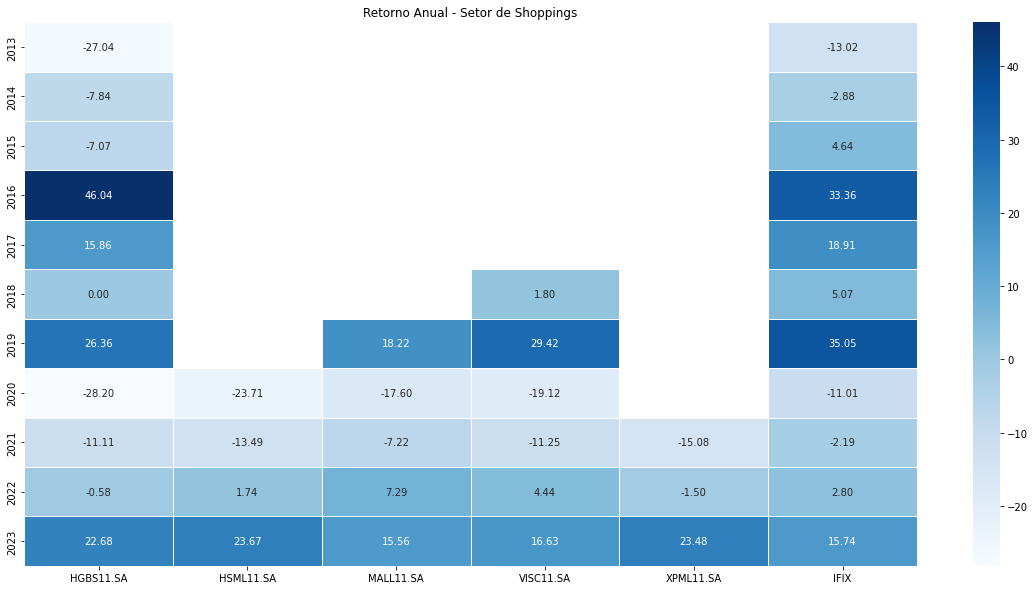

In [20]:
# Retorno anual
ret_anual_shopping = ret_anual(ticker=lst_ticker_fii_shopping, setor='Shoppings', df_benchmark=ifix_precos)

# Df para transformar em excel
df_ret_anual_shopping = ret_anual_shopping[0]

# Plot do retorno anual
ret_anual_shopping[1];

In [21]:
# Retorno acumulado
ret_acumulado_shopping = ret_acumulado(ticker=lst_ticker_fii_shopping, setor='Shoppings', df_benchmark=ifix_precos)

# Df para transformar em excel
df_ret_acumulado_shopping = ret_acumulado_shopping[0]

# Plot do retorno acumulado
ret_acumulado_shopping[1];

[*********************100%***********************]  5 of 5 completed


In [22]:
# Relação risco-retorno
plot_risk_return(ticker=lst_ticker_fii_shopping, setor='Shoppings')

[*********************100%***********************]  5 of 5 completed


**Portfólio dos Shoppings**

In [28]:
# Lendo o arquivo do portfólio - XPML11
df_portfolio_xpml = pd.read_excel(
    io='C://Users//vitor//projetos_python//python_b3//composicao-fundos-de-investimentos//fundo_imobiliario//portfolio_shoppings//xpml11_082024.xlsx',
)

df_portfolio_xpml

,Localização,Nome do Shopping,Endereço,Administrador,ABL Total,Qtde. lojas,Participação,Inauguração
0,"São Paulo, SP",Shopping Cidade Jardim,"Av. Magalhães de Castro, 12.000",JHSF,47080,177,0.1699,2008
1,"São Paulo, SP",Shopping Cidade São Paulo,"Av. Paulista, 1.230",SYN,16906,147,0.4000,2015
2,"São Paulo, SP",Tietê Plaza Shopping,"Av. Raimundo Pereira de Magalhães, 1465",SYN,37000,201,0.9000,2013
3,"São Paulo, SP",Shops Jardins,"Rua Haddock Lobo, 1.625",JHSF,4499,99,0.3000,2020
4,"São Paulo, SP",Plaza Sul Shopping,"Praça Leonor Kaupa, 100",Allos,24039,207,0.2500,1994
5,"São Paulo, SP",Santana Parque Shopping,"Rua Conselheiro Moreira de Barros, 2.780",Partage,26565,164,0.1500,2007
6,"São Paulo, SP",Shopping D,"Av. Cruzeiro do Sul, 1100",SYN,29787,152,0.2300,1994
7,"Campinas, SP",Campinas Shopping,"Rua Jacy Texeira de Camargo, 940",Argo,36152,165,0.2500,1994
8,"São Roque, SP",Catarina Fashion Outlet,"Rodovia Castello Branco, km 60",JHSF,50835,265,0.3999,2014
9,"Guarulhos, SP",Internacional Shopping,"Rodovia Presidente Dutra, saída 225 – s/n",Gazit,75721,390,0.1990,1998


In [29]:
# Lendo o arquivo do portfólio - VISC11
df_portfolio_visc = pd.read_excel(
    io='C://Users//vitor//projetos_python//python_b3//composicao-fundos-de-investimentos//fundo_imobiliario//portfolio_shoppings//visc11_072024.xlsx',
    sheet_name='Capa',
    header=11,
    skipfooter=20
)

# Removendo as colunas 'Unnamed: 0' e 'Unnamed: 2'
df_portfolio_visc = df_portfolio_visc.drop(columns=['Unnamed: 0', 'Unnamed: 2'])

# Renomeando as colunas 'Unnamed: 1' e '%NOI¹'
df_portfolio_visc = df_portfolio_visc.rename(columns={
    'Unnamed: 1': 'Ativos',
    '%NOI¹': '%NOI'
})

df_portfolio_visc

,Ativos,ABL Total (m²),Stake,ABL Própria (m²),Localização,Administrador,%NOI
0,Prudenshopping,31878.820000,1.000000,31878.820000,Presidente Prudente (SP),Argo,0.115762
1,Porto Velho Shopping,45009.160000,0.490000,22054.488400,Porto Velho (RO),Ancar,0.083987
2,Praia da Costa,39965.070000,0.987000,39445.524090,Vila Velha (ES),Soul Malls,0.071072
3,Campinas Shopping,34173.580000,0.550000,18795.469000,Campinas (SP),Argo,0.067917
4,RibeirãoShopping,74881.380000,0.132000,9884.342160,Ribeirão Preto (SP),Multiplan,0.061923
5,Granja Vianna,30376.630000,0.490000,14884.548700,Cotia (SP),Saphyr,0.055529
6,Pantanal Shopping,46471.280000,0.230990,10734.400967,Cuiabá (MT),Ancar,0.051373
7,North Shopping Maracanaú,20089.450000,1.000000,20089.450000,Maracanaú (CE),Ancar,0.050138
8,Shopping Estação,49868.830000,0.350000,17454.090500,Curitiba (PR),Tacla,0.044933
9,Natal Shopping,28188.290000,0.299900,8453.668171,Natal (RN),Ancar,0.034601


In [30]:
# Lendo o arquivo do portfólio - HGBS11
df_portfolio_hgbs = pd.read_excel(
    io='C://Users//vitor//projetos_python//python_b3//composicao-fundos-de-investimentos//fundo_imobiliario//portfolio_shoppings//hgbs11_082024.xlsx',
    sheet_name='Portfólio',
    header=8
)

# Removendo as colunas 'Unnamed: 0' e 'Unnamed: 2'
df_portfolio_hgbs = df_portfolio_hgbs.drop(columns='Unnamed: 0')

# Removendo os NaN para retornar apenas os shoppings
df_portfolio_hgbs = df_portfolio_hgbs.dropna()

df_portfolio_hgbs

,Portfólio Atual,Veículo,ABL Total,Participação HGBS,ABL Própria,Cidade,Administrador
0,Shopping Jardim Sul,Imóvel,28739.03,0.9,25865.127,São Paulo - SP,ALLOS
1,Shopping Center Penha,Imóvel,29769.48,0.875628,26066.990233,São Paulo - SP,AD Shopping
2,Shopping West Plaza,Imóvel + FII,36348.07,0.89124,32394.848759,São Paulo - SP,Soul Malls
3,Parque D. Pedro Shopping,FII,126414.47,0.077328,9775.409278,Campinas - SP,ALLOS
4,Mooca Plaza Shopping,Imóvel,42069.64,0.2,8413.928,São Paulo - SP,ALLOS
5,São Bernardo Plaza Shopping,Imóvel,42901.35,0.35,15015.4725,São Bernardo do Cambo - SP,ALLOS
6,Capim Dourado Shopping,Imóvel,38727.1,0.6,23236.26,Palmas - TO,Soul Malls
7,Tivoli Shopping Center,Imóvel,25889.5,0.59,15274.805,Santa Bárbara D'Oeste - SP,AD Shopping
8,Boulevard Shopping Bauru,Imóvel,34501,0.65,22425.65,Bauru - SP,ALLOS
9,Shopping Villa Lobos,Imóvel,28249.58,0.15,4237.437,São Paulo - SP,ALLOS


In [31]:
# Lendo o arquivo do portfólio - HSML11
df_portfolio_hsml = pd.read_excel(
    io='C://Users//vitor//projetos_python//python_b3//composicao-fundos-de-investimentos//fundo_imobiliario//portfolio_shoppings//hsml11_082024.xlsx',
)

df_portfolio_hsml

,Portfólio,ABL Total (m²),Participação (%),ABL Própria (m²),Ocupação (%)¹,Nº Lojas,Nº Vagas,Abertura
0,Shopping Pátio Maceió,43983,0.700,30788,0.987,143,2058,Novembro 2009
1,Shopping Granja Vianna,30377,0.510,15492,0.957,159,1300,Novembro 2010
2,Super Shopping Osasco,17984,0.588,10583,0.953,131,2800,Outubro 2005
3,Via Verde Shopping,28576,0.967,27623,0.984,100,1200,Novembro 2011
4,Shopping Metrô Tucuruvi,32998,1.000,32998,0.897,221,2188,Abril 2013
5,Shopping Paralela,57800,0.522,38600,0.948,258,2150,Abril 2009
6,Shopping Uberaba,25111,1.000,25111,0.971,188,1190,Abril 1999


In [39]:
# Lendo o arquivo do portfólio - MALL11
df_portfolio_mall = pd.read_excel(
    io='C://Users//vitor//projetos_python//python_b3//composicao-fundos-de-investimentos//fundo_imobiliario//portfolio_shoppings//mall11_082024.xlsx',
    sheet_name='Renda Imobiliária - Ativos',
    header=4
)

# Retirando as colunas
df_portfolio_mall = df_portfolio_mall.drop(columns=[
    'Unnamed: 0', 
    'Unnamed: 2', 
    'Unnamed: 3',
    'Unnamed: 5',
    'Unnamed: 6',
])

# Retirando as linas
df_portfolio_mall = df_portfolio_mall.drop([0,1])

# Renomeando a coluna
df_portfolio_mall = df_portfolio_mall.rename(columns={'Unnamed: 4':'Data de Aquisição'})
df_portfolio_mall

,Renda Imobiliária,Data de Aquisição,2019-01-31 00:00:00,2019-02-28 00:00:00,2019-03-31 00:00:00,2019-04-30 00:00:00,2019-05-31 00:00:00,2019-06-30 00:00:00,2019-07-31 00:00:00,2019-08-31 00:00:00,...,2023-12-31 00:00:00,Total 2023,2024-01-31 00:00:00,2024-02-29 00:00:00,2024-03-31 00:00:00,2024-04-30 00:00:00,2024-05-31 00:00:00,2024-06-30 00:00:00,2024-07-31 00:00:00,YTD 2024
2,Remessa de Resultados - Shoppings,Data de Aquisição,2198523.0,1318037.0,1231579.0,1256888.0,1360790.0,1368506.0,1379597.0,1429317.0,...,12529377.76,1.075451e+08,12968491.22,11406063.71,9373381.59,9179494.85,9.600162e+06,9798679.742,10344038.52,7.267031e+07
3,Shopping Maceió,2017-12-01 00:00:00,2198523.0,1318037.0,1231579.0,1256888.0,1360790.0,1368506.0,1379597.0,1429317.0,...,1654460.35,2.007641e+07,2763334.25,1744327.42,1714965.34,1753214.06,1.724696e+06,1801317.180,1794228.81,1.329608e+07
4,Shopping Suzano,2019-11-01 00:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,226116.14,3.569259e+06,482901.14,295459.43,207641.77,94660.46,6.708223e+05,332268.070,331290.06,2.415043e+06
5,Shopping Tacaruna,2019-09-01 00:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,506587.06,6.562019e+06,907498.27,586954.27,478034.99,544222.12,5.032912e+05,625755.120,590986.36,4.236742e+06
6,Shopping Taboão,2019-12-01 00:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,360000.00,5.355452e+06,624000.00,680000.00,408000.00,424000.00,4.400000e+05,440000.000,557635.12,3.573635e+06
7,Boulevard Shopping Feira + C&A,dez-19 e mar-21,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1100362.68,1.126743e+07,1399451.14,866649.18,849426.73,853598.68,8.504206e+05,874713.780,948724.45,6.642985e+06
8,Shopping Park Lagos,2019-12-01 00:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,994560.50,1.076850e+07,1413286.81,1083736.20,847801.54,1000000.00,8.360000e+05,895635.120,980184.00,7.056644e+06
9,Shopping Park Sul,2019-12-01 00:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,760000.00,7.087825e+06,1280000.00,880000.00,708000.00,700000.00,7.520000e+05,708000.000,876234.96,5.904235e+06
10,Renda Mínima Garantida,-,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1700000.00,3.545815e+06,0.00,930590.00,16639.00,25798.00,0.000000e+00,0.000,0.00,9.730270e+05
11,Madureira Shopping,2021-12-01 00:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4509662.14,3.165316e+07,3058372.08,1922128.56,1555793.32,1826086.78,1.700150e+06,2038005.460,1998588.21,1.409912e+07


* ABL: é um indicador que mede a área total de um shopping center que está disponível para aluguel, exceto os quiosques.

In [40]:
# Transformando em um arquivo excel
with pd.ExcelWriter(f'C://Users//vitor//projetos_python//python_b3//composicao-fundos-de-investimentos//fundo_imobiliario//fii//fii_shoppings.xlsx') as writer:
    fii_xpml.to_excel(writer, sheet_name='XPML11')
    fii_visc.to_excel(writer, sheet_name='VISC11')
    fii_hgbs.to_excel(writer, sheet_name='HGBS11')
    fii_hsml.to_excel(writer, sheet_name='HSML11')
    fii_mall.to_excel(writer, sheet_name='MALL11')
    df_shoppings_dy.to_excel(writer, sheet_name='DIVIDEND_YIELD')
    df_shoppings_dy_accum.to_excel(writer, sheet_name='DIVIDEND_YIELD_ACUM')
    df_vol_drawdown_shopping.to_excel(writer, sheet_name='VOLATILIDADE_DRAWDOWN')
    df_ret_anual_shopping.to_excel(writer, sheet_name='RET_ANUAL')
    df_ret_acumulado_shopping.to_excel(writer, sheet_name='RET_ACUM')

**Indicador P/VP das ações de shoppings**
* Atualizar o 'dict_acoes_shoppings' para calcular o P/VP das empresas de shoppings

In [41]:
# Ações de shoppings
lst_acoes_shoppings = ['ALOS3.SA', 'IGTI11.SA', 'MULT3.SA']

# Dados do 1T2024
dict_acoes_shoppings_1T24 = {
    'tipo_contabilidade': ['mercado', 'custo', 'custo'], 
    'num_acoes':[573936909, 1233106910, 600760875],
    'propriedades_investimento':[21363200000, 5066710000, 83183552000],
    'valor_justo':[21363200000, 14069612000, 29200692000],
    'pl_contabil':[15006995000, 4234679000, 7087747000],
    'abl_propria':[1328809, 491270, 713765],
    'divida_liquida':[3526530000, 1735990000, 2042648000]
}

# Dados do 2T2024
dict_acoes_shoppings_2T24 = {
    'tipo_contabilidade': ['mercado', 'custo', 'custo'], 
    'num_acoes':[542936909, 1217931130, 600760875],
    'propriedades_investimento':[20569241000, 4987082000, 8553030000],
    'valor_justo':[20569241000, 14069612000, 30404491000],
    'pl_contabil':[14888005000, 4159817000, 7164748000],
    'abl_propria':[1276678, 491431, 758820],
    'divida_liquida':[3003939000, 1741906000, 2193197000]
}


df_acoes_shoppings_1T24 = indicadores_acoes_shoppings(
    ano='2024', 
    mes='03', 
    dict_shoppings=dict_acoes_shoppings_1T24, 
    ticker=lst_acoes_shoppings, 
    vm_igti=vm_igti(ano='2024', mes='03', num_on=797612750, num_pn=435494160)
)

df_acoes_shoppings_2T24 = indicadores_acoes_shoppings(
    ano='2024', 
    mes='06', 
    dict_shoppings=dict_acoes_shoppings_2T24, 
    ticker=lst_acoes_shoppings, 
    vm_igti=vm_igti(ano='2024', mes='06', num_on=774849080, num_pn=443082050)
)

[*********************100%***********************]  2 of 2 completed
[*********************100%***********************]  3 of 3 completed
[*********************100%***********************]  2 of 2 completed
[*********************100%***********************]  3 of 3 completed


In [42]:
df_acoes_shoppings_1T24

,tipo_contabilidade,num_acoes,propriedades_investimento,valor_justo,pl_contabil,abl_propria,divida_liquida,preco,diferenca,pl_ajustado,vpa,p/vp,valor_mercado,enterprise_value,ev_abl
ALOS3.SA,mercado,573936909,21363200000,21363200000,15006995000,1328809,3526530000,22.637625,0,15006995000,26.15,0.870000,1.299257e+10,1.651910e+10,12431.51
IGTI11.SA,custo,1233106910,5066710000,14069612000,4234679000,491270,1735990000,22.752413,9002902000,13237581000,10.74,0.706667,6.832566e+09,8.568556e+09,17441.64
MULT3.SA,custo,600760875,83183552000,29200692000,7087747000,713765,2042648000,25.173012,-53982860000,-46895113000,-78.06,-0.320000,1.512296e+10,1.716561e+10,24049.38


In [43]:
df_acoes_shoppings_2T24

,tipo_contabilidade,num_acoes,propriedades_investimento,valor_justo,pl_contabil,abl_propria,divida_liquida,preco,diferenca,pl_ajustado,vpa,p/vp,valor_mercado,enterprise_value,ev_abl
ALOS3.SA,mercado,542936909,20569241000,20569241000,14888005000,1276678,3003939000,21.120001,0,14888005000,27.42,0.77,1.146683e+10,1.447077e+10,11334.70
IGTI11.SA,custo,1217931130,4987082000,14069612000,4159817000,491431,1741906000,20.580000,9082530000,13242347000,10.87,0.63,6.017843e+09,7.759749e+09,15790.11
MULT3.SA,custo,600760875,8553030000,30404491000,7164748000,758820,2193197000,22.540001,21851461000,29016209000,48.30,0.47,1.354115e+10,1.573435e+10,20735.28


### FII - Logístico/Industrial/Galpões

In [44]:
# Lista dos tickers
lst_ticker_fii_logistica = [
    'HGLG11.SA', 
    'BTLG11.SA',
    'XPLG11.SA',
    'LVBI11.SA',
    'BRCO11.SA',
    'TRBL11.SA',
    'KNRI11.SA'
]

# Carregando todos os dados dos FIIs
fii_hglg = fii_cnpj(df=df_ifix, cnpj='11.728.688/0001-47', ticker='HGLG11.SA')
fii_btlg = fii_cnpj(df=df_ifix, cnpj='11.839.593/0001-09', ticker='BTLG11.SA')
fii_xplg = fii_cnpj(df=df_ifix, cnpj='26.502.794/0001-85', ticker='XPLG11.SA')
fii_lvbi = fii_cnpj(df=df_ifix, cnpj='30.629.603/0001-18', ticker='LVBI11.SA')
fii_brco = fii_cnpj(df=df_ifix, cnpj='20.748.515/0001-81', ticker='BRCO11.SA')
fii_trbl = fii_cnpj(df=df_ifix, cnpj='16.671.412/0001-93', ticker='TRBL11.SA')
fii_knri = fii_cnpj(df=df_ifix, cnpj='12.005.956/0001-65', ticker='KNRI11.SA')

# Mesclando todos os últimos dados
fii_logistica = pd.concat([
    fii_hglg,
    fii_btlg,
    fii_xplg,
    fii_lvbi,
    fii_brco,
    fii_trbl,
    fii_knri
])

# Mostrando os dados do último mês divulgado
fii_logistica.loc[
    fii_logistica.index[-1],
    ['Ticker', 'Close', 'Grau_Alavancagem', 'P/VP', 'Percentual_Rentabilidade_Efetiva_Mes', 'Percentual_Dividend_Yield_Mes']
].sort_values('P/VP', ascending=False)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


,Ticker,Close,Grau_Alavancagem,P/VP,Percentual_Rentabilidade_Efetiva_Mes,Percentual_Dividend_Yield_Mes
Data_Referencia,,,,,,
2024-08-01,HGLG11,161.199997,10.689443,1.02,0.67,0.70
2024-08-01,BTLG11,102.669998,9.474321,0.98,0.86,0.82
2024-08-01,BRCO11,115.110001,7.569997,0.97,0.60,0.73
2024-08-01,TRBL11,97.000000,23.369213,0.97,0.48,0.85
2024-08-01,KNRI11,154.009995,6.183947,0.95,0.55,0.62
2024-08-01,XPLG11,103.239998,5.997176,0.92,0.35,0.69
2024-08-01,LVBI11,111.589996,3.726932,0.90,0.57,0.64


In [45]:
# Histórico do indicador P/VP dos FIIs 
historico_p_vp_logistica =plot_historico_p_vp(df=fii_logistica, nome_segmento='Logística')
historico_p_vp_logistica

In [ ]:
fii_logistica.loc[
    fii_logistica['Ticker'] == 'HGLG11', 
    ['CNPJ_Fundo', 'Ticker', 'Close', 'Divida_Total', 'Grau_Alavancagem', 'P/VP', 'Percentual_Rentabilidade_Efetiva_Mes', 'Percentual_Dividend_Yield_Mes']
]

In [ ]:
fii_logistica.loc[
    fii_logistica['Ticker'] == 'BTLG11', 
    ['CNPJ_Fundo', 'Ticker', 'Close', 'Divida_Total', 'Grau_Alavancagem', 'P/VP', 'Percentual_Rentabilidade_Efetiva_Mes', 'Percentual_Dividend_Yield_Mes']
]

In [ ]:
fii_logistica.loc[
    fii_logistica['Ticker'] == 'XPLG11', 
    ['CNPJ_Fundo', 'Ticker', 'Close', 'Divida_Total', 'Grau_Alavancagem', 'P/VP', 'Percentual_Rentabilidade_Efetiva_Mes', 'Percentual_Dividend_Yield_Mes']
]

In [ ]:
fii_logistica.loc[
    fii_logistica['Ticker'] == 'LVBI11', 
    ['CNPJ_Fundo', 'Ticker', 'Close', 'Divida_Total', 'Grau_Alavancagem', 'P/VP', 'Percentual_Rentabilidade_Efetiva_Mes', 'Percentual_Dividend_Yield_Mes']
]

In [ ]:
fii_logistica.loc[
    fii_logistica['Ticker'] == 'BRCO11', 
    ['CNPJ_Fundo', 'Ticker', 'Close', 'Divida_Total', 'Grau_Alavancagem', 'P/VP', 'Percentual_Rentabilidade_Efetiva_Mes', 'Percentual_Dividend_Yield_Mes']
]

In [ ]:
fii_logistica.loc[
    fii_logistica['Ticker'] == 'TRBL11', 
    ['CNPJ_Fundo', 'Ticker', 'Close', 'Divida_Total', 'Grau_Alavancagem', 'P/VP', 'Percentual_Rentabilidade_Efetiva_Mes', 'Percentual_Dividend_Yield_Mes']
]

In [ ]:
fii_logistica.loc[
    fii_logistica['Ticker'] == 'KNRI11', 
    ['CNPJ_Fundo', 'Ticker', 'Close', 'Divida_Total', 'Grau_Alavancagem', 'P/VP', 'Percentual_Rentabilidade_Efetiva_Mes', 'Percentual_Dividend_Yield_Mes']
]

In [46]:
# Volatilidade anual
vol_anual_logistica = vol_anual(ticker=lst_ticker_fii_logistica, ano='2024').sort_values(ascending=False)

# Plotando a volatilidade anual
fig = go.Figure()

fig.add_trace(go.Bar(
    x=vol_anual_logistica.index,
    y=vol_anual_logistica.values
))

fig.update_layout(
    title_text='Volatilidade Anual - FIIs de Logística',
    template='seaborn',
    showlegend=False   
)

fig.show()

[*********************100%***********************]  7 of 7 completed


In [47]:
# Drawdown
drawdown_logistica = drawdown(ticker=lst_ticker_fii_logistica).sort_values(ascending=False)

# Plotando o drawndown
fig = go.Figure()

fig.add_trace(go.Bar(
    x=drawdown_logistica.index,
    y=drawdown_logistica.values
))

fig.update_layout(
    title_text='Drawdown - FIIs Galpões Logísticos',
    template='seaborn',
    showlegend=False   
)

fig.show()

[*********************100%***********************]  7 of 7 completed


In [48]:
# Criando um df da volatilidade anual e o drawdown
df_vol_drawdown_logistica = pd.DataFrame([vol_anual_logistica, drawdown_logistica], index=['volatilidade_anual', 'drawndown']).T
df_vol_drawdown_logistica

,volatilidade_anual,drawndown
LVBI11.SA,13.00,-11.13
TRBL11.SA,12.57,-13.33
KNRI11.SA,11.92,-17.65
BRCO11.SA,11.59,-15.88
XPLG11.SA,11.29,-16.03
BTLG11.SA,9.56,-10.43
HGLG11.SA,8.64,-8.80


In [49]:
# Dividend yield médio, máximo e mínimo dos FII 
df_logistica_dy = dy_fii(df=fii_logistica)

# Plotando o dividend yield médio, máximo e mínimo
fig = make_subplots(
    rows=3, 
    cols=1,
    subplot_titles=[
        'Dividend Yield Médio',
        'Dividend Yield Máximo',
        'Dividend Yield Mínimo'
    ],
    vertical_spacing=0.1
    )

fig.add_trace(go.Bar(
    x=df_logistica_dy.index,
    y=df_logistica_dy['dy_medio'],
    name='DY médio'
), row=1, col=1)

fig.add_trace(go.Bar(
    x=df_logistica_dy.index,
    y=df_logistica_dy['dy_max'],
     name='DY máximo'
), row=2, col=1)

fig.add_trace(go.Bar(
    x=df_logistica_dy.index,
    y=df_logistica_dy['dy_min'],
     name='DY mínimo'
), row=3, col=1)

fig.update_layout(
    title='Dividend yield dos FII de Logística',
    height=1200)

fig.show()

In [50]:
# DY acumulado dos últimos 12 meses
df_logistica_dy_accum = dy_fii_acumm_12m(df=fii_logistica)

# Plotando o DY acumulados dos últimos 12 meses
fig = go.Figure()

for empresa in df_logistica_dy_accum.columns:
    fig.add_trace(go.Scatter(
        x=df_logistica_dy_accum.index,
        y=df_logistica_dy_accum[empresa],
        name=empresa
    ))

fig.update_layout(title='Dividend yield acumulados dos últmos 12 meses - FII de Logística')

fig.show()

[*********************100%***********************]  7 of 7 completed


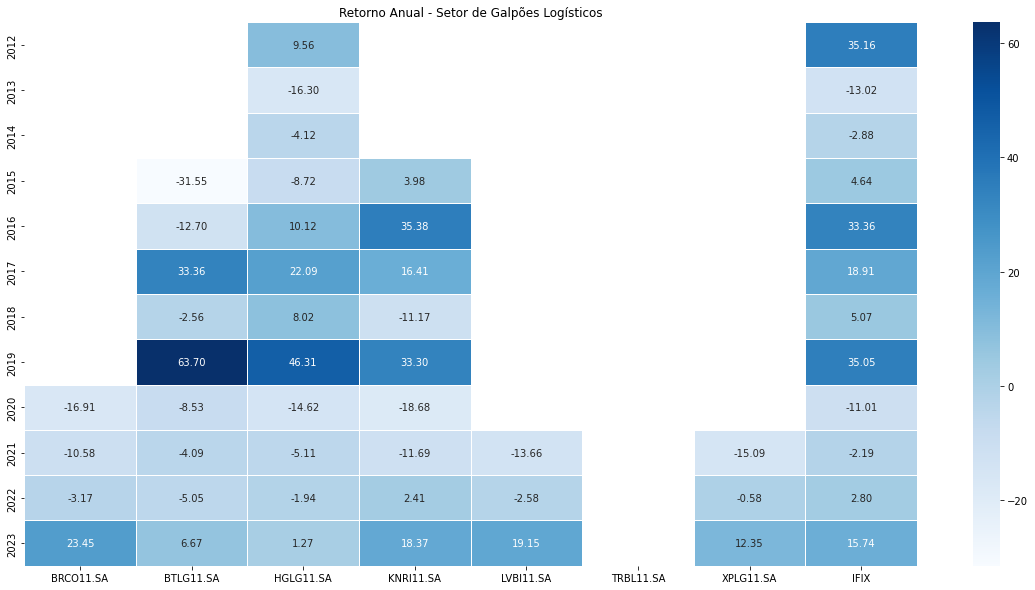

In [51]:
# Retorno anual
ret_anual_logistica = ret_anual(ticker=lst_ticker_fii_logistica, setor='Galpões Logísticos', df_benchmark=ifix_precos)

# Df para transformar em excel
df_ret_anual_logistica = ret_anual_logistica[0]

# Plot do retorno anual
ret_anual_logistica[1];

In [52]:
# Retorno acumulado
ret_acumulado_logistica = ret_acumulado(ticker=lst_ticker_fii_logistica, setor='Galpões Logísticos', df_benchmark=ifix_precos)

# Df para transformar em excel
df_ret_acumulado_logistica = ret_acumulado_logistica[0]

# Plot do retorno anual
ret_acumulado_logistica[1];

[*********************100%***********************]  7 of 7 completed


In [53]:
# Relação risco-retorno
plot_risk_return(ticker=lst_ticker_fii_logistica, setor='Galpões Logísticos')

[*********************100%***********************]  7 of 7 completed


In [54]:
# Transformando em um arquivo excel
with pd.ExcelWriter(f'C://Users//vitor//projetos_python//python_b3//composicao-fundos-de-investimentos//fundo_imobiliario//fii//fii_logistica.xlsx') as writer:
    fii_hglg.to_excel(writer, sheet_name='HGLG11')
    fii_btlg.to_excel(writer, sheet_name='BTLG11')
    fii_xplg.to_excel(writer, sheet_name='XPLG11')
    fii_lvbi.to_excel(writer, sheet_name='LVBI11')
    fii_brco.to_excel(writer, sheet_name='BRCO11')
    fii_trbl.to_excel(writer, sheet_name='TRBL11')
    fii_knri.to_excel(writer, sheet_name='KNRI11')
    df_logistica_dy.to_excel(writer, sheet_name='DIVIDEND_YIELD')
    df_logistica_dy_accum.to_excel(writer, sheet_name='DIVIDEND_YIELD_ACUM')
    df_vol_drawdown_logistica.to_excel(writer, sheet_name='VOLATILIDADE_DRAWDOWN')
    df_ret_anual_logistica.to_excel(writer, sheet_name='RET_ANUAL')
    df_ret_acumulado_logistica.to_excel(writer, sheet_name='RET_ACUM')

### FII - Lajes Corporativas

In [55]:
# Lista dos tickers
lst_ticker_fii_lajes = ['PVBI11.SA', 'HGPO11.SA', 'KORE11.SA']

# Carregando todos os dados dos FIIs
fii_pvbi = fii_cnpj(df=df_ifix, cnpj='35.652.102/0001-76', ticker='PVBI11.SA')
fii_hgpo = fii_cnpj(df=df_ifix, cnpj='11.260.134/0001-68', ticker='HGPO11.SA')
fii_kore = fii_cnpj(df=df_ifix, cnpj='52.219.978/0001-42', ticker='KORE11.SA')

# Mesclando todos os últimos dados
fii_lajes = pd.concat([
    fii_pvbi,
    fii_hgpo,
    fii_kore
])

# Mostrando os dados do último mês divulgado
fii_lajes.loc[
    fii_lajes.index[-1],
    ['Ticker', 'Close', 'Divida_Total', 'Grau_Alavancagem', 'P/VP', 'Percentual_Rentabilidade_Efetiva_Mes', 'Percentual_Dividend_Yield_Mes'] 
].sort_values('P/VP', ascending=False)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


,Ticker,Close,Divida_Total,Grau_Alavancagem,P/VP,Percentual_Rentabilidade_Efetiva_Mes,Percentual_Dividend_Yield_Mes
Data_Referencia,,,,,,,
2024-08-01,KORE11,105.449997,0.0,0.0,0.99,1.14,1.18
2024-08-01,PVBI11,93.690002,0.0,0.0,0.89,0.00,0.00
2024-08-01,HGPO11,303.000000,0.0,0.0,0.88,0.48,0.49


In [56]:
# Histórico do indicador P/VP dos FIIs 
historico_p_vp_lajes =plot_historico_p_vp(df=fii_lajes, nome_segmento='Lajes Corporativas')
historico_p_vp_lajes

In [ ]:
fii_lajes.loc[
    fii_lajes['Ticker'] == 'PVBI11', 
    ['CNPJ_Fundo', 'Ticker', 'Close', 'Divida_Total', 'Grau_Alavancagem', 'P/VP', 'Percentual_Rentabilidade_Efetiva_Mes', 'Percentual_Dividend_Yield_Mes']
]

In [ ]:
fii_lajes.loc[
    fii_lajes['Ticker'] == 'HGPO11', 
    ['CNPJ_Fundo', 'Ticker', 'Close', 'Divida_Total', 'Grau_Alavancagem', 'P/VP', 'Percentual_Rentabilidade_Efetiva_Mes', 'Percentual_Dividend_Yield_Mes']
]

In [ ]:
fii_lajes.loc[
    fii_lajes['Ticker'] == 'KORE11', 
    ['CNPJ_Fundo', 'Ticker', 'Close', 'Divida_Total', 'Grau_Alavancagem', 'P/VP', 'Percentual_Rentabilidade_Efetiva_Mes', 'Percentual_Dividend_Yield_Mes']
]

In [57]:
# Volatilidade anual
vol_anual_lajes = vol_anual(ticker=lst_ticker_fii_lajes, ano='2024').sort_values(ascending=False)

# Plotando a volatilidade anual
fig = go.Figure()

fig.add_trace(go.Bar(
    x=vol_anual_lajes.index,
    y=vol_anual_lajes.values
))

fig.update_layout(
    title_text='Volatilidade Anual - FIIs Lajes Corporativas',
    template='seaborn',
    showlegend=False   
)

fig.show()

[*********************100%***********************]  3 of 3 completed


In [58]:
# Drawdown
drawdown_lajes = drawdown(ticker=lst_ticker_fii_lajes).sort_values(ascending=False)

# Plotando o drawndown
fig = go.Figure()

fig.add_trace(go.Bar(
    x=drawdown_lajes.index,
    y=drawdown_lajes.values
))

fig.update_layout(
    title_text='Drawdown - FIIs Lajes Corporativas',
    template='seaborn',
    showlegend=False   
)

fig.show()

[*********************100%***********************]  3 of 3 completed


In [59]:
# Criando um df da volatilidade anual e o drawdown
df_vol_drawdown_lajes = pd.DataFrame([vol_anual_lajes, drawdown_lajes], index=['volatilidade_anual', 'drawndown']).T
df_vol_drawdown_lajes

,volatilidade_anual,drawndown
HGPO11.SA,14.36,-6.05
PVBI11.SA,12.70,-19.80
KORE11.SA,12.49,-15.11


In [60]:
# Dividend yield médio, máximo e mínimo dos FII 
df_lajes_dy = dy_fii(df=fii_lajes)

# Plotando o dividend yield médio, máximo e mínimo
fig = make_subplots(
    rows=3, 
    cols=1,
    subplot_titles=[
        'Dividend Yield Médio',
        'Dividend Yield Máximo',
        'Dividend Yield Mínimo'
    ],
    vertical_spacing=0.1
    )

fig.add_trace(go.Bar(
    x=df_lajes_dy.index,
    y=df_lajes_dy['dy_medio'],
    name='DY médio'
), row=1, col=1)

fig.add_trace(go.Bar(
    x=df_lajes_dy.index,
    y=df_lajes_dy['dy_max'],
     name='DY máximo'
), row=2, col=1)

fig.add_trace(go.Bar(
    x=df_lajes_dy.index,
    y=df_lajes_dy['dy_min'],
     name='DY mínimo'
), row=3, col=1)

fig.update_layout(
    title='Dividend yield dos FII de Lajes Corporativas',
    height=1200)

fig.show()

In [61]:
# DY acumulado dos últimos 12 meses
df_lajes_dy_accum = dy_fii_acumm_12m(df=fii_lajes)

# Plotando o DY acumulados dos últimos 12 meses
fig = go.Figure()

for empresa in df_lajes_dy_accum.columns:
    fig.add_trace(go.Scatter(
        x=df_lajes_dy_accum.index,
        y=df_lajes_dy_accum[empresa],
        name=empresa
    ))

fig.update_layout(title='Dividend yield acumulados dos últmos 12 meses - FII de Lajes Corporativas')

fig.show()

[*********************100%***********************]  3 of 3 completed


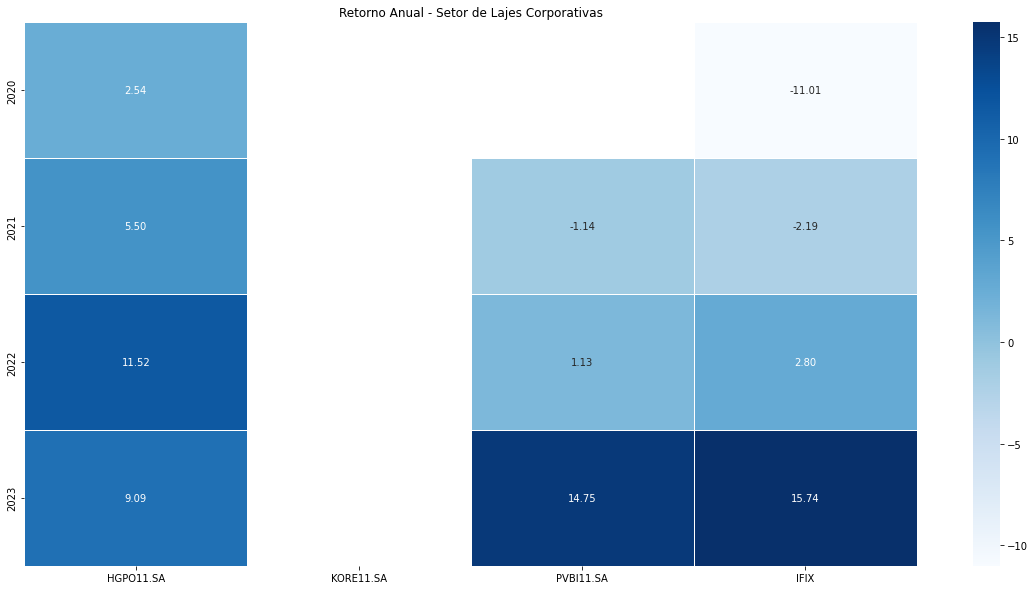

In [62]:
# Retorno anual
ret_anual_lajes = ret_anual(ticker=lst_ticker_fii_lajes, setor='Lajes Corporativas', df_benchmark=ifix_precos)

# Df para transformar em excel
df_ret_anual_lajes = ret_anual_lajes[0]

# Plot do retorno anual
ret_anual_lajes[1];

In [63]:
# Retorno acumulado
ret_acumulado_lajes = ret_acumulado(ticker=lst_ticker_fii_lajes, setor='Lajes Corporativas', df_benchmark=ifix_precos)

# Df para transformar em excel
df_ret_acumulado_lajes = ret_acumulado_lajes[0]

# Plot do retorno anual
ret_acumulado_lajes[1];

[*********************100%***********************]  3 of 3 completed


In [64]:
# Relação risco-retorno
plot_risk_return(ticker=lst_ticker_fii_lajes, setor='Lajes Corporativas')

[*********************100%***********************]  3 of 3 completed


In [65]:
# Transformando em um arquivo excel
with pd.ExcelWriter(f'C://Users//vitor//projetos_python//python_b3//composicao-fundos-de-investimentos//fundo_imobiliario//fii//fii_lajes.xlsx') as writer:
    fii_pvbi.to_excel(writer, sheet_name='PVBI11')
    fii_hgpo.to_excel(writer, sheet_name='HGPO11')
    fii_kore.to_excel(writer, sheet_name='KORE11')
    df_lajes_dy.to_excel(writer, sheet_name='DIVIDEND_YIELD')
    df_lajes_dy_accum.to_excel(writer, sheet_name='DIVIDEND_YIELD_ACUM')
    df_vol_drawdown_lajes.to_excel(writer, sheet_name='VOLATILIDADE_DRAWDOWN')
    df_ret_anual_lajes.to_excel(writer, sheet_name='RET_ANUAL')
    df_ret_acumulado_lajes.to_excel(writer, sheet_name='RET_ACUM')

### FI - Renda Urbana

In [66]:
# Lista dos tickers
lst_ticker_fii_renda_urbana = ['HGRU11.SA', 'TRXF11.SA', 'VIUR11.SA', 'RBVA11.SA']

# Carregando todos os dados dos FIIs
fii_hgru = fii_cnpj(df=df_ifix, cnpj='29.641.226/0001-53', ticker='HGRU11.SA')
fii_trxf = fii_cnpj(df=df_ifix, cnpj='28.548.288/0001-52', ticker='TRXF11.SA')
fii_viur = fii_cnpj(df=df_ifix, cnpj='36.445.587/0001-90', ticker='VIUR11.SA')
fii_rbva = fii_cnpj(df=df_ifix, cnpj='15.576.907/0001-70', ticker='RBVA11.SA')

# Mesclando todos os últimos dados
fii_renda_urbana = pd.concat([
    fii_hgru,
    fii_trxf,
    fii_viur,
    fii_rbva
])

# Mostrando os dados do últimos mês divulgado
fii_renda_urbana.loc[
    fii_renda_urbana.index[-1],
    ['Ticker', 'Close', 'Grau_Alavancagem', 'P/VP', 'Percentual_Rentabilidade_Efetiva_Mes', 'Percentual_Dividend_Yield_Mes']
].sort_values('P/VP', ascending=False)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


,Ticker,Close,Grau_Alavancagem,P/VP,Percentual_Rentabilidade_Efetiva_Mes,Percentual_Dividend_Yield_Mes
Data_Referencia,,,,,,
2024-08-01,HGRU11,127.589996,6.447027,1.02,0.65,0.68
2024-08-01,RBVA11,107.989998,12.294397,1.00,0.83,0.93
2024-08-01,TRXF11,106.160004,31.781057,0.99,2.28,0.88
2024-08-01,VIUR11,6.510000,31.421686,0.74,0.47,0.76


In [67]:
# Histórico do indicador P/VP dos FIIs 
historico_p_vp_renda_urbana = plot_historico_p_vp(df=fii_renda_urbana, nome_segmento='Renda Urbana')
historico_p_vp_renda_urbana

In [ ]:
fii_renda_urbana.loc[
    fii_renda_urbana['Ticker'] == 'HGRU11', 
    ['CNPJ_Fundo', 'Ticker', 'Close', 'Divida_Total', 'Grau_Alavancagem', 'P/VP', 'Percentual_Rentabilidade_Efetiva_Mes', 'Percentual_Dividend_Yield_Mes']
]

In [ ]:
fii_renda_urbana.loc[
    fii_renda_urbana['Ticker'] == 'TRXF11', 
    ['CNPJ_Fundo', 'Ticker', 'Close', 'Divida_Total', 'Grau_Alavancagem', 'P/VP', 'Percentual_Rentabilidade_Efetiva_Mes', 'Percentual_Dividend_Yield_Mes']
]

In [ ]:
fii_renda_urbana.loc[
    fii_renda_urbana['Ticker'] == 'VIUR11', 
    ['CNPJ_Fundo', 'Ticker', 'Close', 'Divida_Total', 'Grau_Alavancagem', 'P/VP', 'Percentual_Rentabilidade_Efetiva_Mes', 'Percentual_Dividend_Yield_Mes']
]

In [ ]:
fii_renda_urbana.loc[
    fii_renda_urbana['Ticker'] == 'RBVA11', 
    ['CNPJ_Fundo', 'Ticker', 'Close', 'Divida_Total', 'Grau_Alavancagem', 'P/VP', 'Percentual_Rentabilidade_Efetiva_Mes', 'Percentual_Dividend_Yield_Mes']
]

In [69]:
# Volatilidade anual
vol_anual_renda_urbana = vol_anual(ticker=lst_ticker_fii_renda_urbana, ano='2024').sort_values(ascending=False)

# Plotando a volatilidade anual
fig = go.Figure()

fig.add_trace(go.Bar(
    x=vol_anual_renda_urbana.index,
    y=vol_anual_renda_urbana.values
))

fig.update_layout(
    title_text='Volatilidade Anual - FIIs Renda Urbana',
    template='seaborn',
    showlegend=False   
)

fig.show()

[*********************100%***********************]  4 of 4 completed


In [70]:
# Drawdown
drawdown_renda_urbana = drawdown(ticker=lst_ticker_fii_renda_urbana).sort_values(ascending=False)

# Plotando o drawndown
fig = go.Figure()

fig.add_trace(go.Bar(
    x=drawdown_renda_urbana.index,
    y=drawdown_renda_urbana.values
))

fig.update_layout(
    title_text='Drawdown - FIIs Renda Urbana',
    template='seaborn',
    showlegend=False   
)

fig.show()

[*********************100%***********************]  4 of 4 completed


In [71]:
# Criando um df da volatilidade anual e o drawdown
df_vol_drawdown_renda_urbana = pd.DataFrame([vol_anual_renda_urbana, drawdown_renda_urbana], index=['volatilidade_anual', 'drawndown']).T
df_vol_drawdown_renda_urbana

,volatilidade_anual,drawndown
VIUR11.SA,18.36,-39.70
RBVA11.SA,10.54,-23.23
HGRU11.SA,9.17,-15.80
TRXF11.SA,5.81,-11.48


In [72]:
# Dividend yield médio, máximo e mínimo dos FII 
df_renda_urbana_dy = dy_fii(df=fii_renda_urbana)

# Plotando o dividend yield médio, máximo e mínimo
fig = make_subplots(
    rows=3, 
    cols=1,
    subplot_titles=[
        'Dividend Yield Médio',
        'Dividend Yield Máximo',
        'Dividend Yield Mínimo'
    ],
    vertical_spacing=0.1
    )

fig.add_trace(go.Bar(
    x=df_renda_urbana_dy.index,
    y=df_renda_urbana_dy['dy_medio'],
    name='DY médio'
), row=1, col=1)

fig.add_trace(go.Bar(
    x=df_renda_urbana_dy.index,
    y=df_renda_urbana_dy['dy_max'],
     name='DY máximo'
), row=2, col=1)

fig.add_trace(go.Bar(
    x=df_renda_urbana_dy.index,
    y=df_renda_urbana_dy['dy_min'],
     name='DY mínimo'
), row=3, col=1)

fig.update_layout(
    title='Dividend yield dos FII de Renda Urbana',
    height=1200)

fig.show()

In [73]:
# DY acumulado dos últimos 12 meses
df_renda_urbana_dy_accum = dy_fii_acumm_12m(df=fii_renda_urbana)

# Plotando o DY acumulados dos últimos 12 meses
fig = go.Figure()

for empresa in df_renda_urbana_dy_accum.columns:
    fig.add_trace(go.Scatter(
        x=df_renda_urbana_dy_accum.index,
        y=df_renda_urbana_dy_accum[empresa],
        name=empresa
    ))

fig.update_layout(title='Dividend yield acumulados dos últmos 12 meses - FII de Renda Urbana')

fig.show()

[*********************100%***********************]  4 of 4 completed


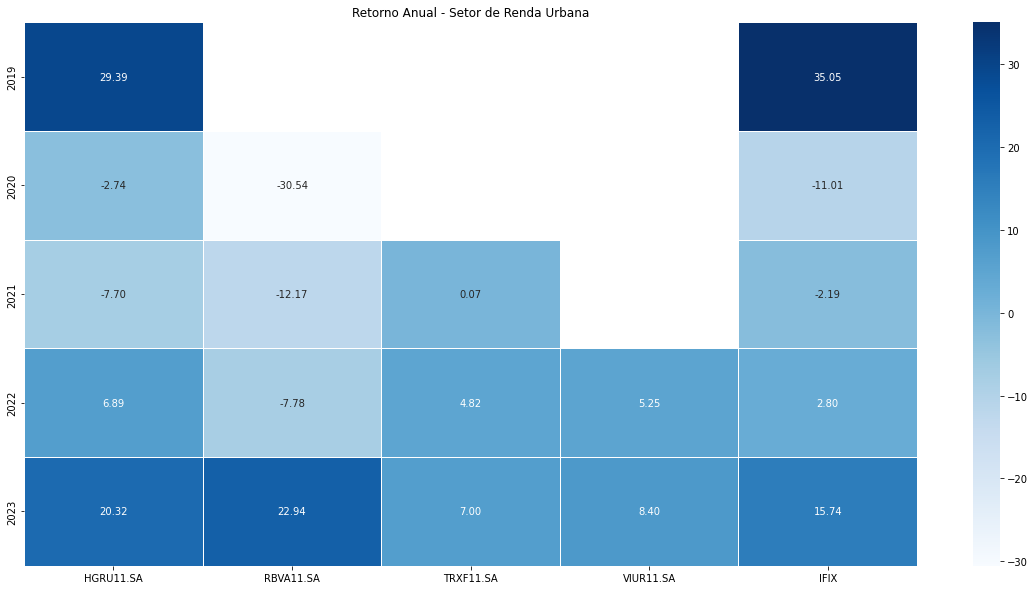

In [74]:
# Retorno anual
ret_anual_renda_urbana = ret_anual(ticker=lst_ticker_fii_renda_urbana, setor='Renda Urbana', df_benchmark=ifix_precos)

# Df para transformar em excel
df_ret_anual_renda_urbana = ret_anual_renda_urbana[0]

# Plot do retorno anual
ret_anual_renda_urbana[1];

In [75]:
# Retorno acumulado
ret_acumulado_renda_urbana = ret_acumulado(ticker=lst_ticker_fii_renda_urbana, setor='Renda Urbana', df_benchmark=ifix_precos)

# Df para transformar em excel
df_ret_acumulado_renda_urbana = ret_acumulado_renda_urbana[0]

# Plot do retorno anual
ret_acumulado_renda_urbana[1];

[*********************100%***********************]  4 of 4 completed


In [76]:
# Relação risco-retorno
plot_risk_return(ticker=lst_ticker_fii_renda_urbana, setor='Renda Urbana')

[*********************100%***********************]  4 of 4 completed


In [77]:
# Transformando em um arquivo excel
with pd.ExcelWriter(f'C://Users//vitor//projetos_python//python_b3//composicao-fundos-de-investimentos//fundo_imobiliario//fii//fii_renda_urbana.xlsx') as writer:
    fii_hgru.to_excel(writer, sheet_name='HGRU11')
    fii_trxf.to_excel(writer, sheet_name='TRXF11')
    fii_viur.to_excel(writer, sheet_name='VIUR11')
    fii_rbva.to_excel(writer, sheet_name='RBVA11')
    df_renda_urbana_dy.to_excel(writer, sheet_name='DIVIDEND_YIELD')
    df_renda_urbana_dy_accum.to_excel(writer, sheet_name='DIVIDEND_YIELD_ACUM')
    df_vol_drawdown_renda_urbana.to_excel(writer, sheet_name='VOLATILIDADE_DRAWDOWN')
    df_ret_anual_renda_urbana.to_excel(writer, sheet_name='RET_ANUAL')
    df_ret_acumulado_renda_urbana.to_excel(writer, sheet_name='RET_ACUM')

### FI - Papel

In [78]:
# Lista dos tickers
lst_ticker_fii_papel = ['KNIP11.SA', 'KNCR11.SA', 'KNSC11.SA', 'HGCR11.SA', 'MXRF11.SA', 'VGIR11.SA']

# Carregando todos os dados dos FIIs
fii_knip = fii_cnpj(df=df_ifix, cnpj='24.960.430/0001-13', ticker='KNIP11.SA')
fii_kncr = fii_cnpj(df=df_ifix, cnpj='16.706.958/0001-32', ticker='KNCR11.SA')
fii_knsc = fii_cnpj(df=df_ifix, cnpj='35.864.448/0001-38', ticker='KNSC11.SA')
fii_hgcr = fii_cnpj(df=df_ifix, cnpj='11.160.521/0001-22', ticker='HGCR11.SA')
fii_mxrf = fii_cnpj(df=df_ifix, cnpj='97.521.225/0001-25', ticker='MXRF11.SA')
fii_vgir = fii_cnpj(df=df_ifix, cnpj='29.852.732/0001-91', ticker='VGIR11.SA')

# Mesclando todos os últimos dados
fii_papel = pd.concat([
    fii_knip,
    fii_kncr,
    fii_knsc,
    fii_hgcr,
    fii_mxrf,
    fii_vgir
])

# Mostrando os dados do último mês divulgado
fii_papel.loc[
    fii_papel.index[-1],
    ['Ticker', 'Close', 'P/VP', 'Percentual_Rentabilidade_Efetiva_Mes', 'Percentual_Dividend_Yield_Mes']
].sort_values('P/VP', ascending=False)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


,Ticker,Close,P/VP,Percentual_Rentabilidade_Efetiva_Mes,Percentual_Dividend_Yield_Mes
Data_Referencia,,,,,
2024-08-01,KNCR11,105.360001,1.04,1.11,0.94
2024-08-01,MXRF11,10.140000,1.04,0.75,0.92
2024-08-01,VGIR11,10.090000,1.04,0.58,0.81
2024-08-01,KNSC11,9.260000,1.03,0.91,1.00
2024-08-01,HGCR11,103.400002,1.03,0.98,0.95
2024-08-01,KNIP11,96.500000,1.01,0.53,0.79


In [79]:
# Histórico do indicador P/VP dos FIIs 
historico_p_vp_papel = plot_historico_p_vp(df=fii_papel, nome_segmento='Papel')
historico_p_vp_papel

In [ ]:
fii_papel.loc[
    fii_papel['Ticker'] == 'KNIP11', 
    ['CNPJ_Fundo', 'Ticker', 'Close', 'Divida_Total', 'Grau_Alavancagem', 'P/VP', 'Percentual_Rentabilidade_Efetiva_Mes', 'Percentual_Dividend_Yield_Mes']
]

In [ ]:
fii_papel.loc[
    fii_papel['Ticker'] == 'KNCR11', 
    ['CNPJ_Fundo', 'Ticker', 'Close', 'Divida_Total', 'Grau_Alavancagem', 'P/VP', 'Percentual_Rentabilidade_Efetiva_Mes', 'Percentual_Dividend_Yield_Mes']
]

In [ ]:
fii_papel.loc[
    fii_papel['Ticker'] == 'KNSC11', 
    ['CNPJ_Fundo', 'Ticker', 'Close', 'Divida_Total', 'Grau_Alavancagem', 'P/VP', 'Percentual_Rentabilidade_Efetiva_Mes', 'Percentual_Dividend_Yield_Mes']
]

In [ ]:
fii_papel.loc[
    fii_papel['Ticker'] == 'HGCR11', 
    ['CNPJ_Fundo', 'Ticker', 'Close', 'Divida_Total', 'Grau_Alavancagem', 'P/VP', 'Percentual_Rentabilidade_Efetiva_Mes', 'Percentual_Dividend_Yield_Mes']
]

In [ ]:
fii_papel.loc[
    fii_papel['Ticker'] == 'MXRF11', 
    ['CNPJ_Fundo', 'Ticker', 'Close', 'Divida_Total', 'Grau_Alavancagem', 'P/VP', 'Percentual_Rentabilidade_Efetiva_Mes', 'Percentual_Dividend_Yield_Mes']
]

In [ ]:
fii_papel.loc[
    fii_papel['Ticker'] == 'VGIR11', 
    ['CNPJ_Fundo', 'Ticker', 'Close', 'Divida_Total', 'Grau_Alavancagem', 'P/VP', 'Percentual_Rentabilidade_Efetiva_Mes', 'Percentual_Dividend_Yield_Mes']
]

In [80]:
# Volatilidade anual
vol_anual_papel = vol_anual(ticker=lst_ticker_fii_papel, ano='2024').sort_values(ascending=False)

# Plotando a volatilidade anual
fig = go.Figure()

fig.add_trace(go.Bar(
    x=vol_anual_papel.index,
    y=vol_anual_papel.values
))

fig.update_layout(
    title_text='Volatilidade Anual - FIIs Papel',
    template='seaborn',
    showlegend=False   
)

fig.show()

[*********************100%***********************]  6 of 6 completed


In [81]:
# Drawdown
drawdown_papel = drawdown(ticker=lst_ticker_fii_papel).sort_values(ascending=False)

# Plotando o drawndown
fig = go.Figure()

fig.add_trace(go.Bar(
    x=drawdown_papel.index,
    y=drawdown_papel.values
))

fig.update_layout(
    title_text='Drawdown - FIIs Papel',
    template='seaborn',
    showlegend=False   
)

fig.show()

[*********************100%***********************]  6 of 6 completed


In [82]:
# Criando um df da volatilidade anual e o drawdown
df_vol_drawdown_papel = pd.DataFrame([vol_anual_papel, drawdown_papel], index=['volatilidade_anual', 'drawndown']).T
df_vol_drawdown_papel

,volatilidade_anual,drawndown
KNSC11.SA,9.42,-14.20
KNCR11.SA,8.39,-9.71
HGCR11.SA,8.10,-8.87
KNIP11.SA,8.08,-14.56
VGIR11.SA,8.07,-10.48
MXRF11.SA,8.00,-11.74


In [83]:
# Dividend yield médio, máximo e mínimo dos FII 
df_papel_dy = dy_fii(df=fii_papel)

# Plotando o dividend yield médio, máximo e mínimo
fig = make_subplots(
    rows=3, 
    cols=1,
    subplot_titles=[
        'Dividend Yield Médio',
        'Dividend Yield Máximo',
        'Dividend Yield Mínimo'
    ],
    vertical_spacing=0.1
    )

fig.add_trace(go.Bar(
    x=df_papel_dy.index,
    y=df_papel_dy['dy_medio'],
    name='DY médio'
), row=1, col=1)

fig.add_trace(go.Bar(
    x=df_papel_dy.index,
    y=df_papel_dy['dy_max'],
     name='DY máximo'
), row=2, col=1)

fig.add_trace(go.Bar(
    x=df_papel_dy.index,
    y=df_papel_dy['dy_min'],
     name='DY mínimo'
), row=3, col=1)

fig.update_layout(
    title='Dividend yield dos FII de Papel',
    height=1200)

fig.show()

In [84]:
# DY acumulado dos últimos 12 meses
df_papel_dy_accum = dy_fii_acumm_12m(df=fii_papel)

# Plotando o DY acumulados dos últimos 12 meses
fig = go.Figure()

for empresa in df_papel_dy_accum.columns:
    fig.add_trace(go.Scatter(
        x=df_papel_dy_accum.index,
        y=df_papel_dy_accum[empresa],
        name=empresa
    ))

fig.update_layout(title='Dividend yield acumulados dos últmos 12 meses - FII de Papel')

fig.show()

[*********************100%***********************]  6 of 6 completed


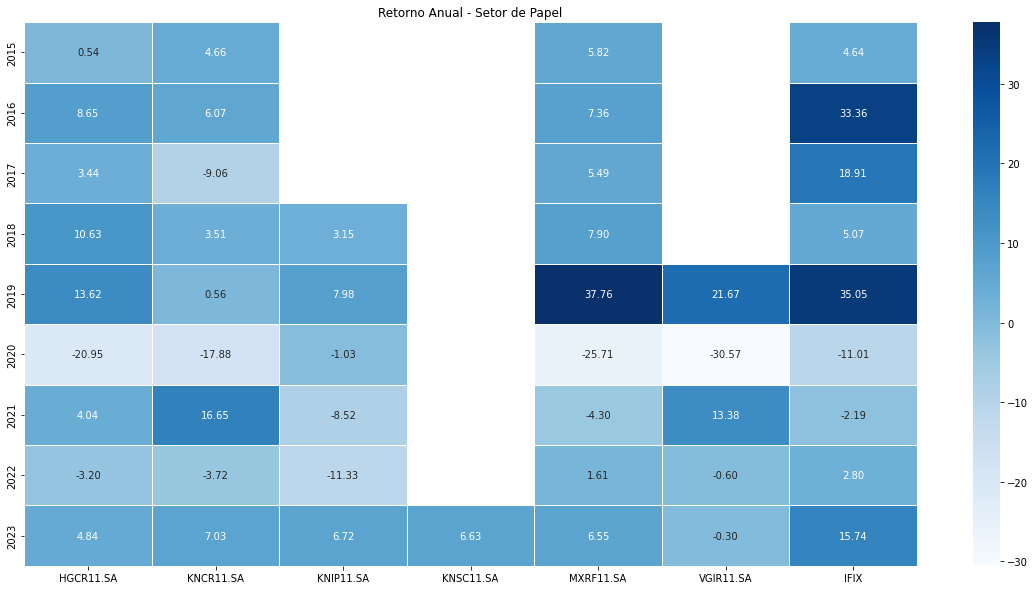

In [85]:
# Retorno anual
ret_anual_papel = ret_anual(ticker=lst_ticker_fii_papel, setor='Papel', df_benchmark=ifix_precos)

# Df para transformar em excel
df_ret_anual_papel = ret_anual_papel[0]

# Plot do retorno anual
ret_anual_papel[1];

In [86]:
# Retorno acumulado
ret_acumulado_papel = ret_acumulado(ticker=lst_ticker_fii_papel, setor='Papel', df_benchmark=ifix_precos)

# Df para transformar em excel
df_ret_acumulado_papel = ret_acumulado_papel[0]

# Plot do retorno anual
ret_acumulado_papel[1];

[*********************100%***********************]  6 of 6 completed


In [87]:
# Relação risco-retorno
plot_risk_return(ticker=lst_ticker_fii_papel, setor='Papel')

[*********************100%***********************]  6 of 6 completed


**Análisando a carteira de CRIs dos FIIs** 

* Esse arquivo excel 'cris_{mesano}' foi feito na mão para compilar as carteiras de CRIs dos FIIs de papeis.

In [88]:
# KNIP11
df_cris_knip = pd.read_excel(
    io='C://Users//vitor//projetos_python//python_b3//composicao-fundos-de-investimentos//fundo_imobiliario//cris//cris_082024.xlsx',
    sheet_name='knip_082024'
)

# Selecionando as principais colunas
df_cris_knip = df_cris_knip[[
    'ATIVO', 
    'DEVEDOR / ATIVO IMOBILIARIO', 
    'INDEX.', 
    '% DA CARTEIRA', 
    'TAXA AQUISIÇÃO', 
    'TAXA MTM', 
    'LTV', 
    'VENCIMENTO DO CRI'
]]

# Arrumando o dtypes das colunas
df_cris_knip['TAXA AQUISIÇÃO'] = df_cris_knip['TAXA AQUISIÇÃO'].replace('-', 0).astype(float)
df_cris_knip['TAXA MTM'] = df_cris_knip['TAXA MTM'].replace('-', 0).astype(float)

# Preenchendo os NaN
df_cris_knip['LTV'] = df_cris_knip['LTV'].fillna(0)

# Análise do LTV
ltv_knip_media_ponderada = round(np.average(df_cris_knip.loc[df_cris_knip['ATIVO'] == 'CRI', 'LTV'], weights=df_cris_knip.loc[df_cris_knip['ATIVO'] == 'CRI', '% DA CARTEIRA']) * 100, 2)
ltv_knip_media = round(df_cris_knip.loc[df_cris_knip['ATIVO'] == 'CRI', 'LTV'].mean() * 100, 2)
ltv_knip_max = round(df_cris_knip.loc[df_cris_knip['ATIVO'] == 'CRI', 'LTV'].max() * 100, 2)
ltv_knip_min = round(df_cris_knip.loc[df_cris_knip['ATIVO'] == 'CRI', 'LTV'].min() * 100, 2)
ltv_knip_num_zero = len(df_cris_knip.loc[(df_cris_knip['ATIVO'] == 'CRI') & (df_cris_knip['LTV'] == 0)])

# Números total de ativos
num_ativos_knip = len(df_cris_knip)

# Número total de CRIs
num_cris_knip = len(df_cris_knip.loc[df_cris_knip['ATIVO'] == 'CRI'])

# Tipos de ativos no portfólio
ativos_knip = df_cris_knip['ATIVO'].unique()
# Transformando a lista em uma string única
ativos_knip = ', '.join(ativos_knip) 

# Contando os números de cada ativo do KNIP11
tipo_ativos_knip = df_cris_knip.loc[:, 'ATIVO'].value_counts()

# Contagem dos CRIs no KNIP11 por índice
tipo_cri_knip = df_cris_knip.loc[df_cris_knip['ATIVO'] == 'CRI', 'INDEX.'].value_counts()

# Tipos de indexadores
indexadores_knip = tipo_cri_knip.index
# Transformando a lista em uma string única
indexadores_knip = ', '.join(indexadores_knip)
# Retirando a string '+'
indexadores_knip = indexadores_knip.replace('+', '').strip()

# Plotando o subplot
fig = make_subplots(
    rows=2,
    cols=1,
    specs=[[{'type':'domain'}], [{'type':'domain'}]],
    subplot_titles=(
        'Distribuição dos ativos',
        'Distribuição dos indexadores dos CRIs'),
    vertical_spacing=0.08  # Aumentando o espaçamento vertical
)

fig.add_trace(go.Pie(
    values=tipo_ativos_knip, 
    labels=tipo_ativos_knip.index,
    legendgroup='ativos_knip',  
    showlegend=True,
    textposition='inside',
    ), 
    row=1, col=1
)

fig.add_trace(go.Pie(
    values=tipo_cri_knip, 
    labels=tipo_cri_knip.index,
    legendgroup='cri_knip', 
    showlegend=True,
    textposition='inside',
    ), 
    row=2, col=1
)

fig.update_layout(
    title_text='Distribuição dos Ativos e Indexadores dos CRIs - KNIP11',
    height=1000
)

fig.show()

In [89]:
# CRIs que estão ganhando com marcação a mercado
df_cris_knip.loc[df_cris_knip['TAXA AQUISIÇÃO'] > df_cris_knip['TAXA MTM']]

,ATIVO,DEVEDOR / ATIVO IMOBILIARIO,INDEX.,% DA CARTEIRA,TAXA AQUISIÇÃO,TAXA MTM,LTV,VENCIMENTO DO CRI
23,CRI,Rede D'or,IPCA +,0.013871,0.047666,0.044901,0.0,2031-07-02


In [90]:
# KNCR11
df_cris_kncr = pd.read_excel(
    io='C://Users//vitor//projetos_python//python_b3//composicao-fundos-de-investimentos//fundo_imobiliario//cris//cris_082024.xlsx',
    sheet_name='kncr_082024'
)

# Selecionando as principais colunas
df_cris_kncr = df_cris_kncr[[
    'ATIVO', 
    'DEVEDOR / ATIVO IMOBILIARIO', 
    'INDEX.', 
    '% DA CARTEIRA', 
    'TAXA AQUISIÇÃO', 
    'TAXA MTM', 
    'LTV', 
    'VENCIMENTO DO CRI'
]]

# Arrumando o dtypes das colunas
df_cris_kncr['TAXA AQUISIÇÃO'] = df_cris_kncr['TAXA AQUISIÇÃO'].replace('-', 0).astype(float)
df_cris_kncr['TAXA MTM'] = df_cris_kncr['TAXA MTM'].replace('-', 0).astype(float)

# Preenchendo os NaN
df_cris_kncr['LTV'] = df_cris_kncr['LTV'].fillna(0)

# Análise do LTV
ltv_kncr_media_ponderada = round(np.average(df_cris_kncr.loc[df_cris_kncr['ATIVO'] == 'CRI', 'LTV'], weights=df_cris_kncr.loc[df_cris_kncr['ATIVO'] == 'CRI', '% DA CARTEIRA']) * 100, 2)
ltv_kncr_media = round(df_cris_kncr.loc[df_cris_kncr['ATIVO'] == 'CRI', 'LTV'].mean() * 100, 2)
ltv_kncr_max = round(df_cris_kncr.loc[df_cris_kncr['ATIVO'] == 'CRI', 'LTV'].max() * 100, 2)
ltv_kncr_min = round(df_cris_kncr.loc[df_cris_kncr['ATIVO'] == 'CRI', 'LTV'].min() * 100, 2)
ltv_kncr_num_zero = len(df_cris_kncr.loc[(df_cris_kncr['ATIVO'] == 'CRI') & (df_cris_kncr['LTV'] == 0)])

# Números total de ativos
num_ativos_kncr = len(df_cris_kncr)

# Número total de CRIs
num_cris_kncr = len(df_cris_kncr.loc[df_cris_kncr['ATIVO'] == 'CRI'])

# Tipos de ativos no portfólio
ativos_kncr = df_cris_kncr['ATIVO'].unique()
# Transformando a lista em uma string única
ativos_kncr = ', '.join(ativos_kncr) 

# Contando os números de cada ativo do KNCR11
tipo_ativos_kncr = df_cris_kncr.loc[:, 'ATIVO'].value_counts()

# Contagem dos CRIs no KNCR11 por índice
tipo_cri_kncr = df_cris_kncr.loc[df_cris_kncr['ATIVO'] == 'CRI', 'INDEX.'].value_counts()

# Tipos de indexadores
indexadores_kncr = tipo_cri_kncr.index
# Transformando a lista em uma string única
indexadores_kncr = ', '.join(indexadores_kncr)
# Retirando a string '+'
indexadores_kncr = indexadores_kncr.replace('+', '').strip()

# Plotando o subplot
fig = make_subplots(
    rows=2,
    cols=1,
    specs=[[{'type':'domain'}], [{'type':'domain'}]],
    subplot_titles=(
        'Distribuição dos ativos',
        'Distribuição dos indexadores dos CRIs'),
    vertical_spacing=0.08  # Aumentando o espaçamento vertical
)

fig.add_trace(go.Pie(
    values=tipo_ativos_kncr, 
    labels=tipo_ativos_kncr.index,
    legendgroup='ativos_kncr',  
    showlegend=True,
    textposition='inside',
    ), 
    row=1, col=1
)

fig.add_trace(go.Pie(
    values=tipo_cri_kncr, 
    labels=tipo_cri_kncr.index,
    legendgroup='cri_kncr', 
    showlegend=True,
    textposition='inside',
    ), 
    row=2, col=1
)

fig.update_layout(
    title_text='Distribuição dos Ativos e Indexadores dos CRIs - KNCR11',
    height=1000
)

fig.show()

In [91]:
# CRIs que estão ganhando com marcação a mercado
df_cris_kncr.loc[df_cris_kncr['TAXA AQUISIÇÃO'] > df_cris_kncr['TAXA MTM']]

,ATIVO,DEVEDOR / ATIVO IMOBILIARIO,INDEX.,% DA CARTEIRA,TAXA AQUISIÇÃO,TAXA MTM,LTV,VENCIMENTO DO CRI
13,CRI,Even Estoque,CDI +,0.021312,0.025500,0.025500,0.66,2028-11-29
14,CRI,Ed. Sucupira,CDI +,0.020518,0.020000,0.014353,0.75,2027-06-17
20,CRI,Shopping Paralela II,CDI +,0.016016,0.028000,0.019508,0.41,2036-12-31
21,CRI,Brookfield CD Sakamoto,CDI +,0.015625,0.025700,0.021885,0.65,2027-09-27
26,CRI,Portfólio de Ed. Corporativos em São Paulo,CDI +,0.014299,0.022500,0.022487,0.59,2028-03-09
27,CRI,BRZ - Carteira Pro-soluto SR,CDI +,0.014039,0.024000,0.024000,0.00,2029-06-27
30,CRI,MRV pro-soluto 297,CDI +,0.012947,0.020950,0.020950,0.00,2030-03-20
31,CRI,Shopping Cidade Jardim II,CDI +,0.012944,0.025000,0.025000,0.43,2038-06-18
32,CRI,Hotel Hilton Copacabana,CDI +,0.012356,0.020000,0.019986,0.50,2034-03-27
39,CRI,Shopping Bahia,CDI +,0.008449,0.027500,0.027500,0.58,2037-01-26


In [92]:
# KNSC11
df_cris_knsc = pd.read_excel(
    io='C://Users//vitor//projetos_python//python_b3//composicao-fundos-de-investimentos//fundo_imobiliario//cris//cris_082024.xlsx',
    sheet_name='knsc_082024'
)

# Selecionando as principais colunas
df_cris_knsc = df_cris_knsc[[
    'ATIVO', 
    'DEVEDOR / ATIVO IMOBILIARIO', 
    'INDEX.', 
    '% DA CARTEIRA', 
    'TAXA AQUISIÇÃO', 
    'TAXA MTM', 
    'LTV', 
    'VENCIMENTO DO CRI'
]]

# Arrumando o dtypes das colunas
df_cris_knsc['TAXA AQUISIÇÃO'] = df_cris_knsc['TAXA AQUISIÇÃO'].replace('-', 0).astype(float)
df_cris_knsc['TAXA MTM'] = df_cris_knsc['TAXA MTM'].replace('-', 0).astype(float)

# Preenchendo os NaN
df_cris_knsc['LTV'] = df_cris_knsc['LTV'].fillna(0)

# Análise do LTV
ltv_knsc_media_ponderada = round(np.average(df_cris_knsc.loc[df_cris_knsc['ATIVO']=='CRI', 'LTV'], weights=df_cris_knsc.loc[df_cris_knsc['ATIVO']=='CRI', '% DA CARTEIRA']) * 100, 2)
ltv_knsc_media = round(df_cris_knsc.loc[df_cris_knsc['ATIVO']=='CRI', 'LTV'].mean() * 100, 2)
ltv_knsc_max = round(df_cris_knsc.loc[df_cris_knsc['ATIVO']=='CRI', 'LTV'].max() * 100, 2)
ltv_knsc_min = round(df_cris_knsc.loc[df_cris_knsc['ATIVO']=='CRI', 'LTV'].min() * 100, 2)
ltv_knsc_num_zero = len(df_cris_knsc.loc[(df_cris_knsc['ATIVO'] == 'CRI') & (df_cris_knsc['LTV'] == 0)])

# Números total de ativos
num_ativos_knsc = len(df_cris_knsc)

# Número total de CRIs
num_cris_knsc = len(df_cris_knsc.loc[df_cris_knsc['ATIVO'] == 'CRI'])

# Tipos de ativos no portfólio
ativos_knsc = df_cris_knsc['ATIVO'].unique()
# Transformando a lista em uma string única
ativos_knsc = ', '.join(ativos_knsc) 

# Contando os números de cada ativo do KNCR11
tipo_ativos_knsc = df_cris_knsc.loc[:, 'ATIVO'].value_counts()

# Contagem dos CRIs no KNCR11 por índice
tipo_cri_knsc = df_cris_knsc.loc[df_cris_knsc['ATIVO'] == 'CRI', 'INDEX.'].value_counts()

# Tipos de indexadores
indexadores_knsc = tipo_cri_knsc.index
# Transformando a lista em uma string única
indexadores_knsc = ', '.join(indexadores_knsc)
# Retirando a string '+'
indexadores_knsc = indexadores_knsc.replace('+', '').strip()

# Plotando o subplot
fig = make_subplots(
    rows=2,
    cols=1,
    specs=[[{'type':'domain'}], [{'type':'domain'}]],
    subplot_titles=(
        'Distribuição dos ativos',
        'Distribuição dos indexadores dos CRIs'),
    vertical_spacing=0.08  # Aumentando o espaçamento vertical
)

fig.add_trace(go.Pie(
    values=tipo_ativos_knsc, 
    labels=tipo_ativos_knsc.index,
    legendgroup='ativos_knsc',  
    showlegend=True,
    textposition='inside',
    ), 
    row=1, col=1
)

fig.add_trace(go.Pie(
    values=tipo_cri_knsc, 
    labels=tipo_cri_knsc.index,
    legendgroup='cri_knsc', 
    showlegend=True,
    textposition='inside',
    ), 
    row=2, col=1
)

fig.update_layout(
    title_text='Distribuição dos Ativos e Indexadores dos CRIs - KNSC11',
    height=1000
)

fig.show()

In [93]:
# CRIs que estão ganhando com marcação a mercado
df_cris_knsc.loc[df_cris_knsc['TAXA AQUISIÇÃO'] > df_cris_knsc['TAXA MTM']]

,ATIVO,DEVEDOR / ATIVO IMOBILIARIO,INDEX.,% DA CARTEIRA,TAXA AQUISIÇÃO,TAXA MTM,LTV,VENCIMENTO DO CRI
40,CRI,Ed. Varanda,CDI +,0.023462,0.031000,0.030847,0.45,2028-05-08
46,CRI,Brookfield CD Sakamoto,CDI +,0.007993,0.025700,0.021885,0.65,2027-09-27
48,CRI,Construtora Capital Jr,CDI +,0.007859,0.077200,0.077200,0.65,2025-10-15
52,CRI,MRV pro-soluto 224,CDI +,0.006185,0.051700,0.051680,0.00,2029-09-28
53,CRI,Tecnisa,CDI +,0.005881,0.055734,0.037500,0.00,2026-03-13
54,CRI,Projetos Residenciais Campo Grande e Maringá,CDI +,0.005354,0.032500,0.032489,0.00,2029-02-17
55,CRI,Plaenge,CDI +,0.005232,0.032610,0.032500,0.00,2028-09-20
57,CRI,Plaenge,CDI +,0.004246,0.032610,0.032500,0.00,2028-09-20
58,CRI,Estoque residencial Curitiba,CDI +,0.003949,0.053000,0.053000,0.75,2027-03-29
59,CRI,Projetos Residenciais Campo Grande e Maringá,CDI +,0.002994,0.032500,0.032489,0.00,2029-02-17


In [94]:
# HGCR11
df_cris_hgcr = pd.read_excel(
    io='C://Users//vitor//projetos_python//python_b3//composicao-fundos-de-investimentos//fundo_imobiliario//cris//cris_082024.xlsx',
    sheet_name='hgcr_082024'
)

# Selecionando as principais colunas
df_cris_hgcr = df_cris_hgcr[[
    'Ativo', 
    'Nome', 
    'Indexador', 
    '% PL', 
    'Taxa Média', 
    'LTV', 
    'Rating', 
    'Venc.'
]]

# Análise do LTV
ltv_hgcr_media_ponderada = round(np.average(df_cris_hgcr['LTV'], weights=df_cris_hgcr['% PL']) * 100, 2)
ltv_hgcr_media = round(df_cris_hgcr['LTV'].mean() * 100, 2)
ltv_hgcr_max = round(df_cris_hgcr['LTV'].max() * 100, 2)
ltv_hgcr_min = round(df_cris_hgcr['LTV'].min() * 100, 2)
ltv_hgcr_num_zero = len(df_cris_hgcr.loc[df_cris_hgcr['LTV'] == 0])

# Números total de ativos
num_ativos_hgcr = len(df_cris_hgcr)

# Contagem dos CRIs no HGCR11 por índice
tipo_cri_hgcr = df_cris_hgcr.loc[:, 'Indexador'].value_counts()

# Tipos de indexadores
indexadores_hgcr = tipo_cri_hgcr.index
# Transformando a lista em uma string única
indexadores_hgcr = ', '.join(indexadores_hgcr)

# Criando o gráfico de pizza com plotly
fig = px.pie(
    values=tipo_cri_hgcr, 
    names=tipo_cri_hgcr.index, 
    title='Distribuição dos Indexadores dos CRIs - HGCR11'
)

fig.show()

In [95]:
# MXRF11
df_cris_mxrf = pd.read_excel(
    io='C://Users//vitor//projetos_python//python_b3//composicao-fundos-de-investimentos//fundo_imobiliario//cris//cris_082024.xlsx',
    sheet_name='mxrf_072024'
)

# Selecionando as principais colunas
df_cris_mxrf = df_cris_mxrf[[
    'Devedor',
    'Index.',
    '% do PL',
    'Taxa Emissão',
    'Vencimento'
]]

# Números total de ativos
num_ativos_mxrf = len(df_cris_mxrf)

# Contagem dos CRIs no MXRF11 por índice
tipo_cri_mxrf = df_cris_mxrf.loc[:, 'Index.'].value_counts()

# Tipos de indexadores
indexadores_mxrf = tipo_cri_mxrf.index
# Transformando a lista em uma string única
indexadores_mxrf = ', '.join(indexadores_mxrf)
# Retirando a string '+'
indexadores_mxrf = indexadores_mxrf.replace('+', '').strip()

# Criando o gráfico de pizza com plotly
fig = px.pie(
    values=tipo_cri_mxrf, 
    names=tipo_cri_mxrf.index, 
    title='Distribuição dos Indexadores dos CRIs - MXRF11'
)

fig.show()

In [96]:
# VGIR11
df_cris_vgir = pd.read_excel(
    io='C://Users//vitor//projetos_python//python_b3//composicao-fundos-de-investimentos//fundo_imobiliario//cris//cris_082024.xlsx',
    sheet_name='vgir_082024'
)

# Selecionando as principais colunas
df_cris_vgir = df_cris_vgir[['Ativo', 'Indexador', '% PL', 'Cupom', 'LTV', 'Vencimento']]

# Arrumando o dtypes das colunas
df_cris_vgir['LTV'] = df_cris_vgir['LTV'].replace('na', 0).astype(float)

# Análise do LTV
ltv_vgir_media_ponderada = round(np.average(df_cris_vgir['LTV'], weights=df_cris_vgir['% PL']) * 100, 2)
ltv_vgir_media = round(df_cris_vgir['LTV'].mean() * 100, 2)
ltv_vgir_max = round(df_cris_vgir['LTV'].max() * 100, 2)
ltv_vgir_min = round(df_cris_vgir['LTV'].min() * 100, 2)
ltv_vgir_num_zero = len(df_cris_vgir.loc[df_cris_vgir['LTV'] == 0])

# Números total de ativos
num_ativos_vgir = len(df_cris_vgir)

# Contagem dos CRIs no VGIR11 por índice
tipo_cri_vgir = df_cris_vgir.loc[:, 'Indexador'].value_counts()

# Tipos de indexadores
indexadores_vgir = tipo_cri_vgir.index
# Transformando a lista em uma string única
indexadores_vgir = ', '.join(indexadores_vgir)
# Retirando a string '+'
indexadores_vgir = indexadores_vgir.replace('+', '').strip()

# Criando o gráfico de pizza com plotly
fig = px.pie(
    values=tipo_cri_vgir, 
    names=tipo_cri_vgir.index, 
    title='Distribuição dos Indexadores dos CRIs - VGIR11'
)

fig.show()

In [97]:
# Dicionário com as informações do portfólio dos FIIs de papeis
dict_portfolio_papel = {
    'num_total_ativos': [
        num_ativos_knip,
        num_ativos_kncr, 
        num_ativos_knsc,
        num_ativos_hgcr,
        num_ativos_mxrf,
        num_ativos_vgir
    ],
    # No arquivo excel, os fundos das Kinea mostram as outras compras de ativos como LCI, FIIs e Caixa
    'tipos_ativos': [
        ativos_knip,
        ativos_kncr, 
        ativos_knsc,
        'CRI',
        'CRI',
        'CRI'
    ],
    'num_cris': [
        num_cris_knip, 
        num_cris_kncr, 
        num_cris_knsc,
        num_ativos_hgcr,
        num_ativos_mxrf,
        num_ativos_vgir
    ],
    'indexador_principal':[
        tipo_cri_knip.index[0],
        tipo_cri_kncr.index[0],
        tipo_cri_knsc.index[0],
        tipo_cri_hgcr.index[0],
        tipo_cri_mxrf.index[0],
        tipo_cri_vgir.index[0]
    ],
    'tipo_indexadores':[
        indexadores_knip,
        indexadores_kncr,
        indexadores_knsc,
        indexadores_hgcr,
        indexadores_mxrf,
        indexadores_vgir
    ],
    'ltv_media_ponderada': [
        ltv_knip_media_ponderada,
        ltv_kncr_media_ponderada,
        ltv_knsc_media_ponderada,
        ltv_hgcr_media_ponderada,
        52, # MXRF11 divulga o LTV médio no arquivo 'Relatório Gerencial'
        ltv_vgir_media_ponderada
    ],
    'ltv_media': [
        ltv_knip_media,
        ltv_kncr_media,
        ltv_knsc_media,
        ltv_hgcr_media,
        52, # MXRF11 divulga o LTV médio no arquivo 'Relatório Gerencial'
        ltv_vgir_media
    ],
    'ltv_max': [
        ltv_knip_max,
        ltv_kncr_max,
        ltv_knsc_max,
        ltv_hgcr_max,
        0, # MXRF11 não divulga o ltv no arquivo excel
        ltv_vgir_max
    ],
    'ltv_min': [
        ltv_knip_min,
        ltv_kncr_min,
        ltv_knsc_min,
        ltv_hgcr_min,
        0, # MXRF11 não divulga o ltv no arquivo excel
        ltv_vgir_min
    ],
    'num_ltv_zero': [
        ltv_knip_num_zero,
        ltv_kncr_num_zero,
        ltv_knsc_num_zero,
        ltv_hgcr_num_zero,
        0, # MXRF11 não divulga o ltv no arquivo excel
        ltv_vgir_num_zero
    ]
}

# Transformando em um df
df_portfolio_papel = pd.DataFrame(dict_portfolio_papel, index=lst_ticker_fii_papel)

# Retirando a string '+' da coluna 'indexador_principal'
df_portfolio_papel['indexador_principal'] = df_portfolio_papel['indexador_principal'].str.replace('+','', regex=True).str.strip()
df_portfolio_papel

,num_total_ativos,tipos_ativos,num_cris,indexador_principal,tipo_indexadores,ltv_media_ponderada,ltv_media,ltv_max,ltv_min,num_ltv_zero
KNIP11.SA,105,"CRI, FII, LCI, Cx., Total",100,IPCA,"IPCA , IGPM",52.85,44.08,77.00,0.00,24
KNCR11.SA,71,"CRI, LCI, Cx., Total",68,CDI,"CDI , IPCA",54.99,44.97,75.00,0.00,14
KNSC11.SA,70,"CRI, FII, Cx., Total",65,IPCA,"IPCA , CDI",39.74,38.74,85.00,0.00,22
HGCR11.SA,45,CRI,45,IPCA,"IPCA, CDI, IGP-M, IGP-DI",52.85,48.71,78.00,4.96,0
MXRF11.SA,87,CRI,87,IPCA,"IPCA , CDI , IGP-M , Pré",52.00,52.00,0.00,0.00,0
VGIR11.SA,49,CRI,49,CDI,CDI,61.43,57.33,105.05,0.00,1


In [98]:
# Transformando em um arquivo excel
with pd.ExcelWriter(f'C://Users//vitor//projetos_python//python_b3//composicao-fundos-de-investimentos//fundo_imobiliario//fii//fii_papel.xlsx') as writer:
    fii_knip.to_excel(writer, sheet_name='KNIP11')
    fii_kncr.to_excel(writer, sheet_name='KNCR11')
    fii_knsc.to_excel(writer, sheet_name='KNSC11')
    fii_hgcr.to_excel(writer, sheet_name='HGCR11')
    fii_mxrf.to_excel(writer, sheet_name='MXRF11')
    fii_vgir.to_excel(writer, sheet_name='VGIR11')
    df_papel_dy.to_excel(writer, sheet_name='DIVIDEND_YIELD')
    df_papel_dy_accum.to_excel(writer, sheet_name='DIVIDEND_YIELD_ACUM')
    df_vol_drawdown_papel.to_excel(writer, sheet_name='VOLATILIDADE_DRAWDOWN')
    df_ret_anual_papel.to_excel(writer, sheet_name='RET_ANUAL')
    df_ret_acumulado_papel.to_excel(writer, sheet_name='RET_ACUM')
    df_portfolio_papel.to_excel(writer, sheet_name='PORTFOLIO_CRIS')

#### Comparando a taxa de retorno (MTM) dos FIIs com a taxa dos títulos públicos

* Vídeo: https://www.youtube.com/watch?v=rMaNf6ycss0
* Última atualização feita em 16/08/2024:
    * Os dados do MTM (Taxa de Retorno) dos fundos estão no "Relatório Gerencial" (divulgado mensalmente);
    * Download do arquivo csv "PrecoTaxaTesouroDireto" ("Histórico Geral" - "Consolidado Preços e Taxas") -> https://www.tesourodireto.com.br/titulos/historico-de-precos-e-taxas.htm

In [101]:
# Meta Selic (432)
meta_selic = consulta_bc(codigo_bcb='432')
# Selecionando a última meta selic
ultima_meta_selic = meta_selic['valor'][-1]

# CDI (4392) - Taxa de juros - CDI acumulada no mês anualizada base 252	
cdi_anualizado = consulta_bc(codigo_bcb='4392')
# Selecionando o último cdi anualizado
ultimo_cdi_anualizado = cdi_anualizado['valor'][-1]

# IPCA (433) - Índice nacional de preços ao consumidor-amplo (mensal)
ipca =  consulta_bc(codigo_bcb='433')
# Calculando o IPCA acumulado dos últimos 12 meses
ipca['taxa_unit'] = (ipca / 100) + 1
ipca['ipca_acumulado'] = round((ipca['taxa_unit'].rolling(window=12).agg(lambda x : x.prod()) -1) * 100, 2)
# Selecionando o último IPCA acumulado dos últimos 12 meses
ultimo_ipca_acumulado = ipca['ipca_acumulado'][-1]

* **Atualizar os números do 'MTM_IPCA' e 'MTM_CDI' do dicionário 'dict_fii_papel'**

In [105]:
# Lista dos tickers
lst_ticker_fii_papel = [
    'KNIP11.SA', 
    'KNCR11.SA', 
    'KNSC11.SA', 
    'HGCR11.SA', 
    'MXRF11.SA'
]

dict_fii_papel = {
    'Indexador': ['IPCA', 'CDI', 'MISTO', 'MISTO', 'MISTO'], 
    'MTM_IPCA':[8.67, 0, 8.97, 9.1, 9.68],
    'MTM_CDI': [0, 2.43, 3.54, 3.6, 3.06],
}

# Transformando em um df
df_fii_papel = pd.DataFrame(dict_fii_papel, index=lst_ticker_fii_papel)

# Soma do 'MTM_IPCA' com o IPCA dos últimos 12 meses
df_fii_papel['Taxa_IPCA'] = df_fii_papel['MTM_IPCA'] + ultimo_ipca_acumulado
df_fii_papel.loc['KNCR11.SA', 'Taxa_IPCA'] = 0

# Soma do 'MTM_CDI' com o CDI anualizado
df_fii_papel['Taxa_CDI'] = df_fii_papel['MTM_CDI'] + ultimo_cdi_anualizado
df_fii_papel.loc['KNIP11.SA', 'Taxa_CDI'] = 0

In [106]:
# Lendo o arquivo
df_titulo_publico = pd.read_csv(
    'C://Users//vitor//projetos_python//python_b3//composicao-fundos-de-investimentos//fundo_imobiliario//titulos_publicos//PrecoTaxaTesouroDireto.csv', 
    sep=';'
)

# Transformando as colunas em datetime
df_titulo_publico['Data Vencimento'] = pd.to_datetime(df_titulo_publico['Data Vencimento'], format='%d/%m/%Y')
df_titulo_publico['Data Base'] = pd.to_datetime(df_titulo_publico['Data Base'], format='%d/%m/%Y')
# Trocando os ',' por '.'
df_titulo_publico['Taxa Compra Manha'] = df_titulo_publico['Taxa Compra Manha'].str.replace(',', '.').astype(float)
df_titulo_publico['Taxa Venda Manha'] = df_titulo_publico['Taxa Venda Manha'].str.replace(',', '.').astype(float)
df_titulo_publico['PU Compra Manha'] = df_titulo_publico['PU Compra Manha'].str.replace(',', '.').astype(float)
df_titulo_publico['PU Venda Manha'] = df_titulo_publico['PU Venda Manha'].str.replace(',', '.').astype(float)
df_titulo_publico['PU Base Manha'] = df_titulo_publico['PU Base Manha'].str.replace(',', '.').astype(float)

# Tesouro IPCA+ 2035
filt = (df_titulo_publico['Tipo Titulo'] == 'Tesouro IPCA+') & (df_titulo_publico['Data Vencimento'] == '2035-05-15')
tesouro_ipca_2035 = df_titulo_publico.loc[filt].sort_values('Data Base')
# Selecionando a última taxa do IPCA+ 2035
ultima_taxa_tesouro_ipca_2035 = tesouro_ipca_2035['Taxa Compra Manha'].iloc[-1]

# Tesouro SELIC 2029
filt = (df_titulo_publico['Tipo Titulo'] == 'Tesouro Selic') & (df_titulo_publico['Data Vencimento'] == '2029-03-01')
tesouro_selic_2029 = df_titulo_publico.loc[filt].sort_values('Data Base')
# Selecionando a última taxa do SELIC 2029
ultima_taxa_tesouro_selic_2029 = tesouro_selic_2029['Taxa Compra Manha'].iloc[-1]

# Títulos públicos 
lst_titulo_publico = ['IPCA_2035', 'SELIC_2029']

dict_titulo_publico = {
    'Ultima_Taxa': [ultima_taxa_tesouro_ipca_2035, ultima_taxa_tesouro_selic_2029],
    'Taxa_Indexador': [ultimo_ipca_acumulado, ultima_meta_selic]
}

# Transformando em um df
df_titulo_publico_final = pd.DataFrame(dict_titulo_publico, index=lst_titulo_publico)

# Calculando a taxa dos títulos públicos
df_titulo_publico_final['Taxa_Titulo'] = df_titulo_publico_final['Ultima_Taxa'] + df_titulo_publico_final['Taxa_Indexador']

In [107]:
print('='*60)
print(f'A meta SELIC é de {ultima_meta_selic}')
print(f'O IPCA de 12 meses é de {ultimo_ipca_acumulado}')
print(f'O CDI anualizado é de {ultimo_cdi_anualizado}')
print('='*60)
print(df_fii_papel)
print('='*60)
print(df_titulo_publico_final)
print('='*60)

A meta SELIC é de 10.75
O IPCA de 12 meses é de 4.24
O CDI anualizado é de 10.65
          Indexador  MTM_IPCA  MTM_CDI  Taxa_IPCA  Taxa_CDI
KNIP11.SA      IPCA      8.67     0.00      12.91      0.00
KNCR11.SA       CDI      0.00     2.43       0.00     13.08
KNSC11.SA     MISTO      8.97     3.54      13.21     14.19
HGCR11.SA     MISTO      9.10     3.60      13.34     14.25
MXRF11.SA     MISTO      9.68     3.06      13.92     13.71
            Ultima_Taxa  Taxa_Indexador  Taxa_Titulo
IPCA_2035          6.46            4.24        10.70
SELIC_2029         0.14           10.75        10.89


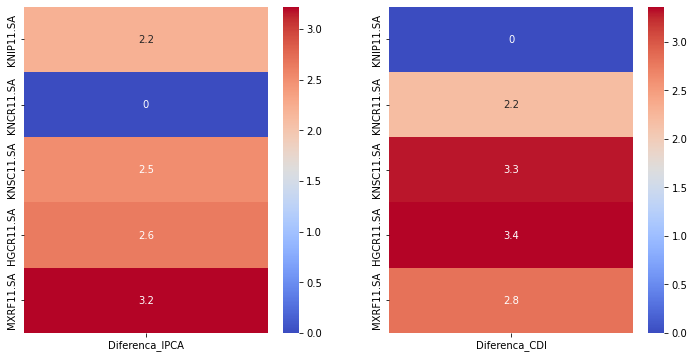

In [109]:
# Calculando a diferença entre a taxa do FII e a taxa do título
df_fii_papel['Diferenca_IPCA'] = df_fii_papel['Taxa_IPCA'] - df_titulo_publico_final.loc['IPCA_2035' ,'Taxa_Titulo']
df_fii_papel.loc['KNCR11.SA', 'Diferenca_IPCA'] = 0

df_fii_papel['Diferenca_CDI'] = df_fii_papel['Taxa_CDI'] - df_titulo_publico_final.loc['SELIC_2029' ,'Taxa_Titulo']
df_fii_papel.loc['KNIP11.SA', 'Diferenca_CDI'] = 0


# Plotando o heatmap
fig, axes = plt.subplots(ncols=2, figsize=(12, 6))

sns.heatmap(
    df_fii_papel['Diferenca_IPCA'].values.reshape(-1, 1), 
    annot=True, 
    cmap='coolwarm', 
    yticklabels=df_fii_papel.index,
    ax=axes[0]
)
axes[0].set_xticks([0.5])
axes[0].set_xticklabels(['Diferenca_IPCA'], rotation=0)

sns.heatmap(
    df_fii_papel['Diferenca_CDI'].values.reshape(-1, 1), 
    annot=True, 
    cmap='coolwarm', 
    yticklabels=df_fii_papel.index,
    ax=axes[1]
)
axes[1].set_xticks([0.5])
axes[1].set_xticklabels(['Diferenca_CDI'], rotation=0)

plt.show()

**Interpretação**
* Quanto maior for a diferença entre a MTM e a taxa dos títulos públicos, o FII é mais arriscado (High yield - compra CRIs que possuem maiores riscos);
* Quanto menor for a diferença entre a MTM e a taxa dos títulos públicos, o FII é mais seguro (High grade - compra CRIs que possuem menores riscos).
